### Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from scipy.stats import rankdata, norm
from scipy.stats import chi2_contingency

### Reading the dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

Age Education_Level  Occupation  Number_of_Dependents Location  \
0   56        Master's  Technology                     5    Urban   
1   69     High School     Finance                     0    Urban   
2   46      Bachelor's  Technology                     1    Urban   
3   32     High School      Others                     2    Urban   
4   60      Bachelor's     Finance                     3    Urban   

   Work_Experience Marital_Status Employment_Status  Household_Size  \
0               21        Married         Full-time               7   
1                4         Single         Full-time               7   
2                1         Single         Full-time               7   
3               32        Married         Full-time               1   
4               15        Married     Self-employed               4   

  Homeownership_Status     Type_of_Housing  Gender  \
0                  Own           Apartment    Male   
1                  Own           Apartment    Male   
2                  Own  Single-family home  Female   
3                  Own           Apartment  Female   
4                  Own           Townhouse    Male   

  Primary_Mode_of_Transportation  Income  
0                 Public transit   72510  
1                         Biking   75462  
2                            Car   71748  
3                            Car   74520  
4                        Walking  640210

In [3]:
df.shape

(10000, 14)

In [4]:
df_num = df.select_dtypes(exclude="object")
df_cat = df.select_dtypes(exclude="int64")
df_num.corr()["Income"]

Age                     0.008739
Number_of_Dependents    0.011413
Work_Experience        -0.027541
Household_Size         -0.011356
Income                  1.000000
Name: Income, dtype: float64

In [5]:
categorical_var = list(df_cat.columns)
numerical_var = list(df_num.columns)

### Univariate Analysis

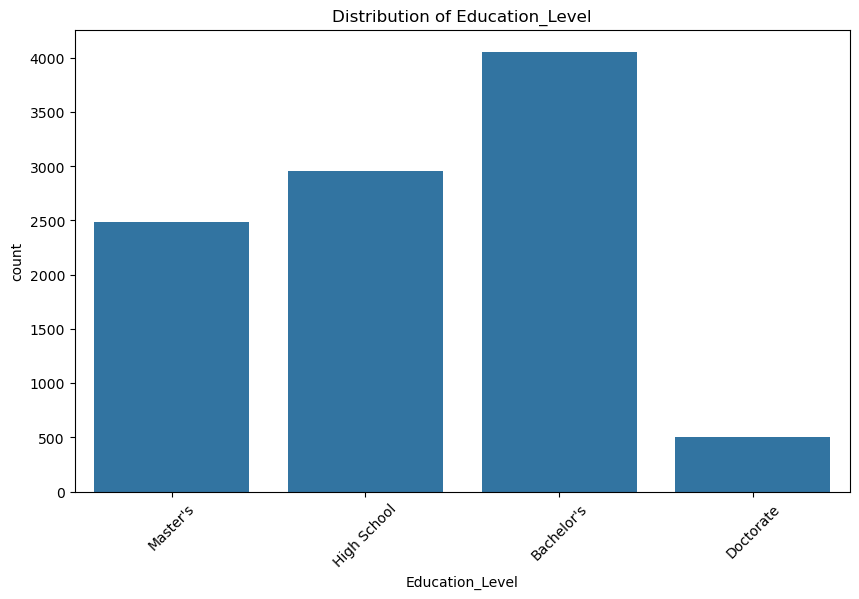

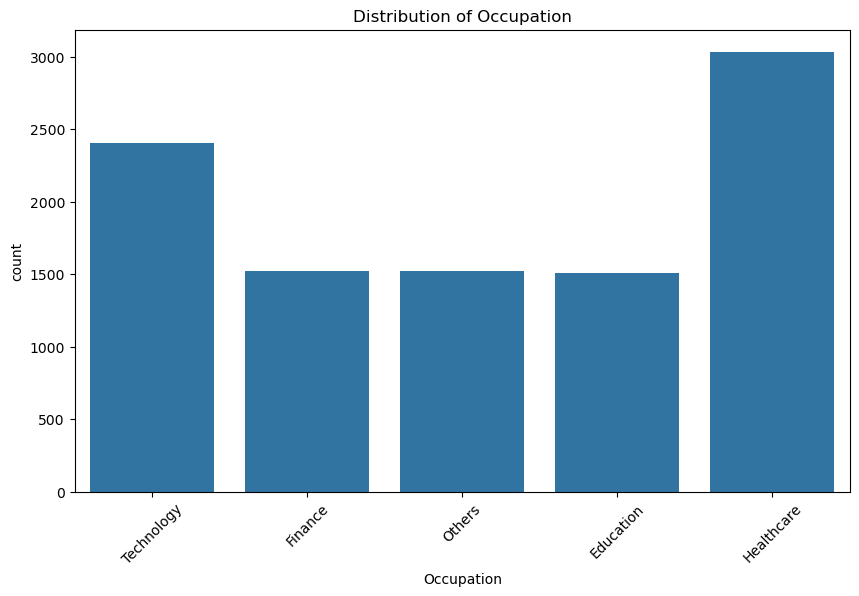

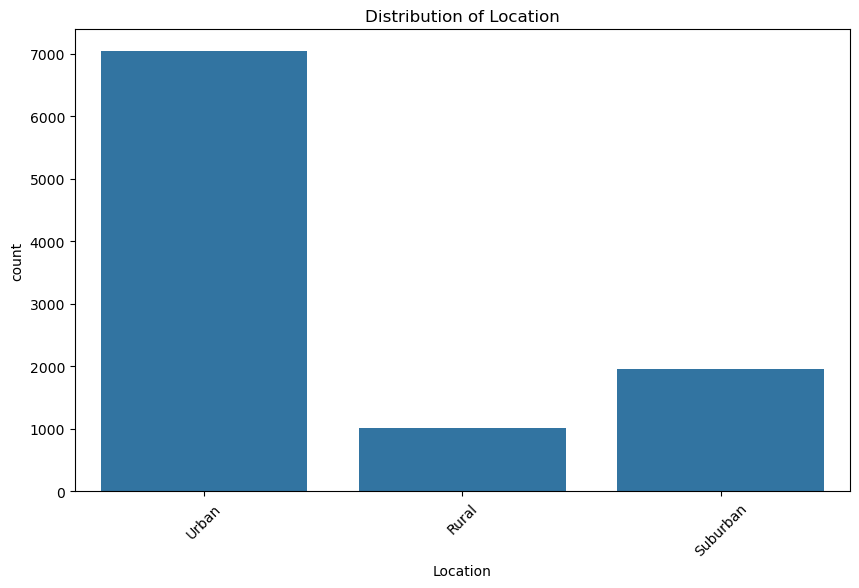

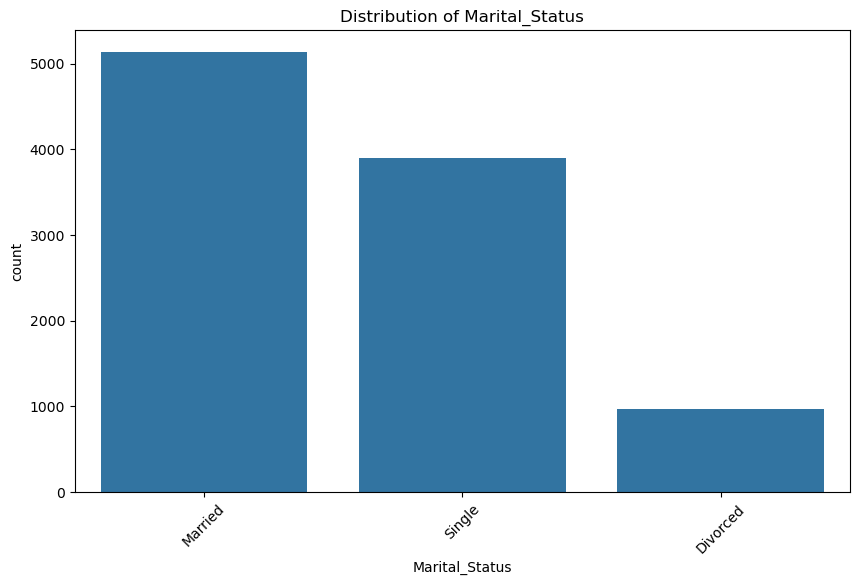

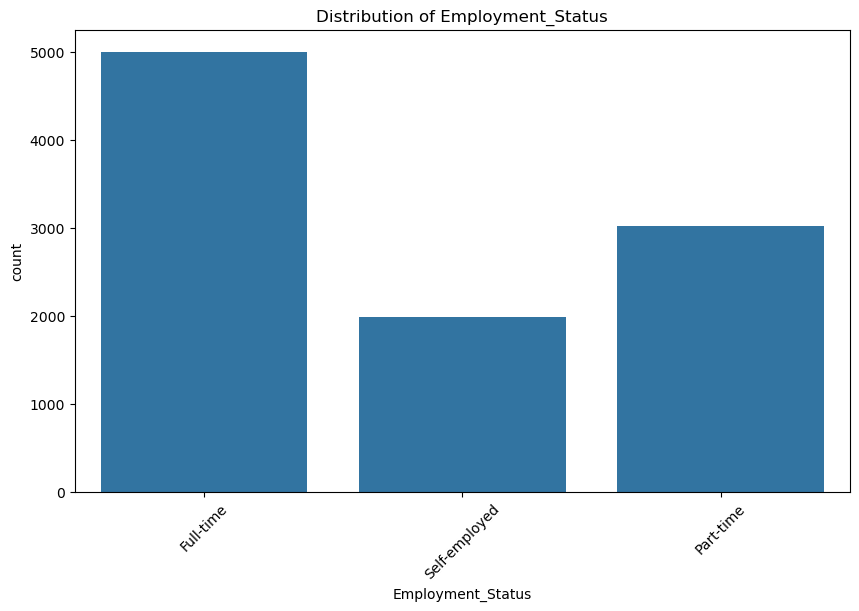

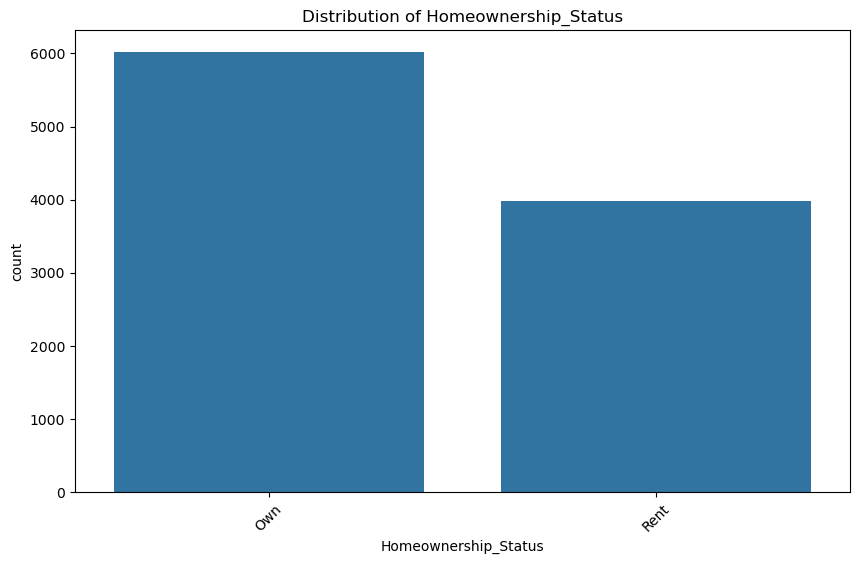

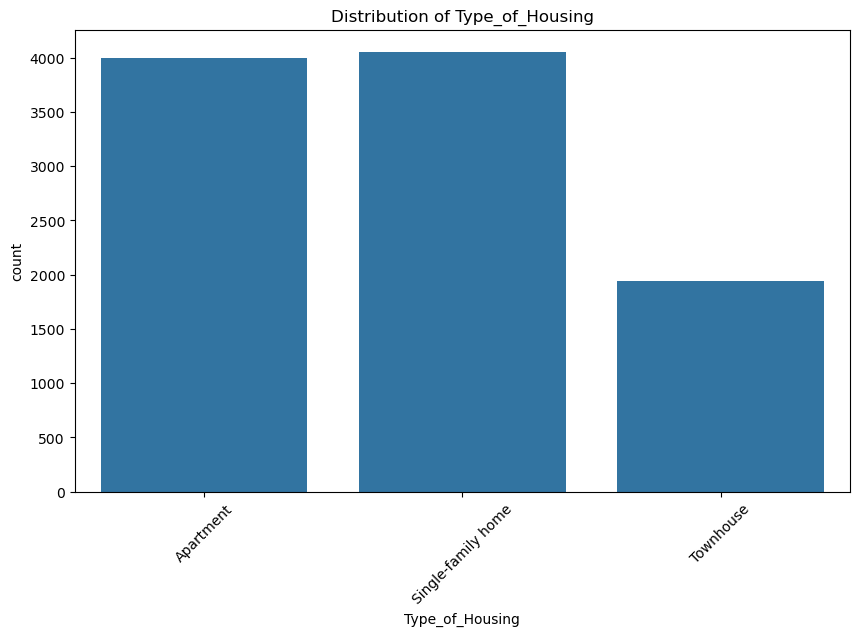

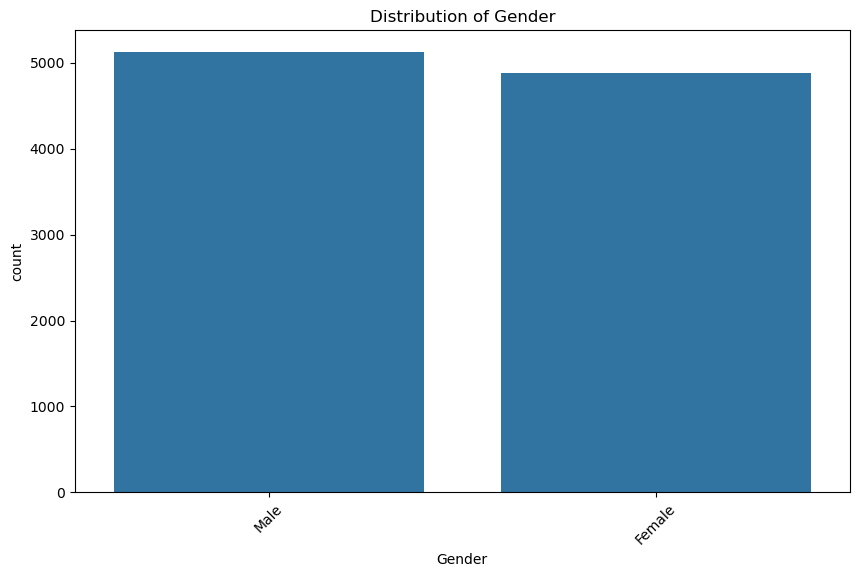

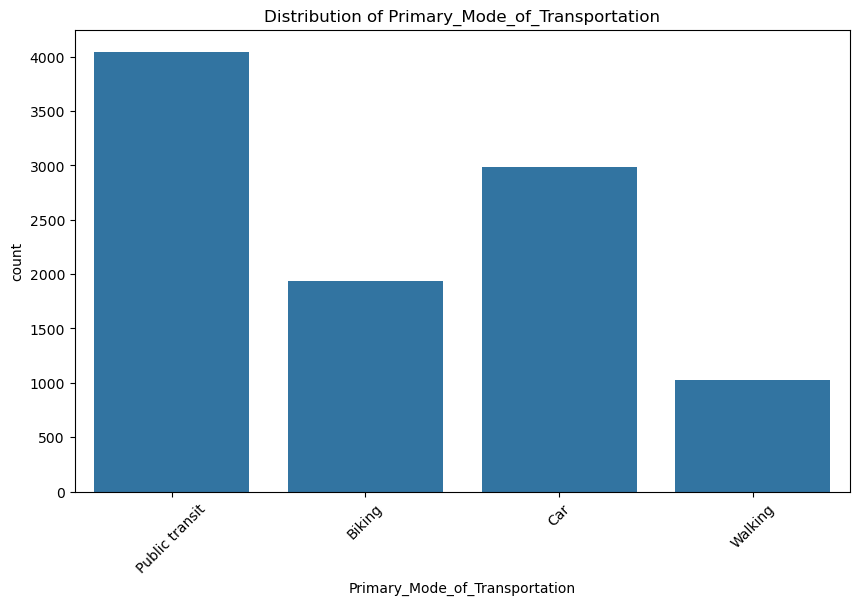

In [7]:
for var in categorical_var:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f"Distribution of {var}")
    plt.xticks(rotation=45)
    plt.show()

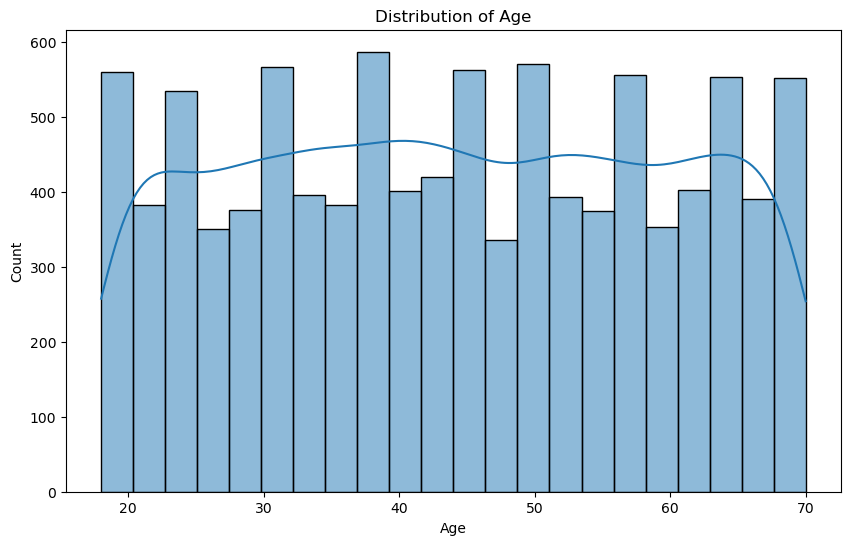

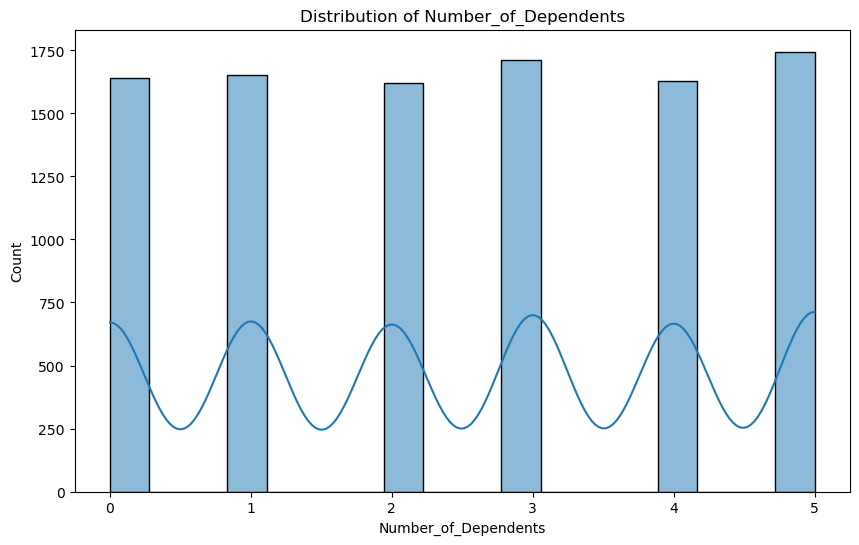

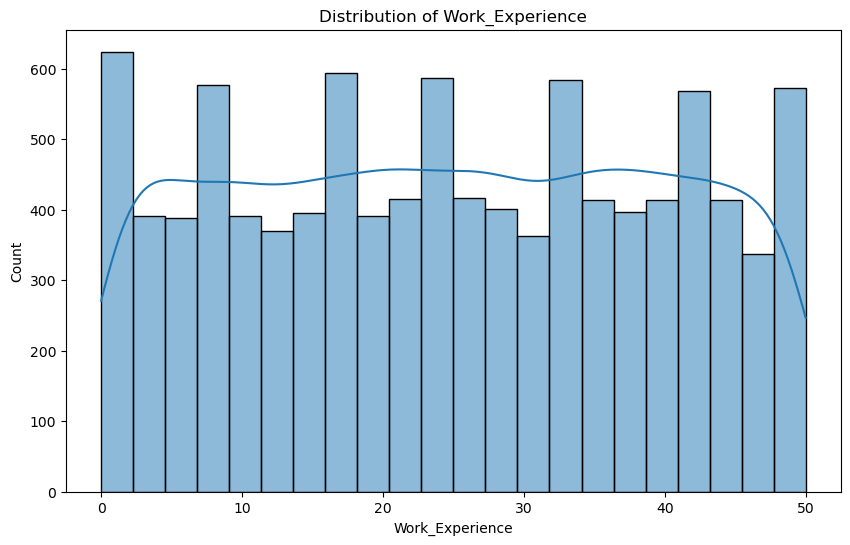

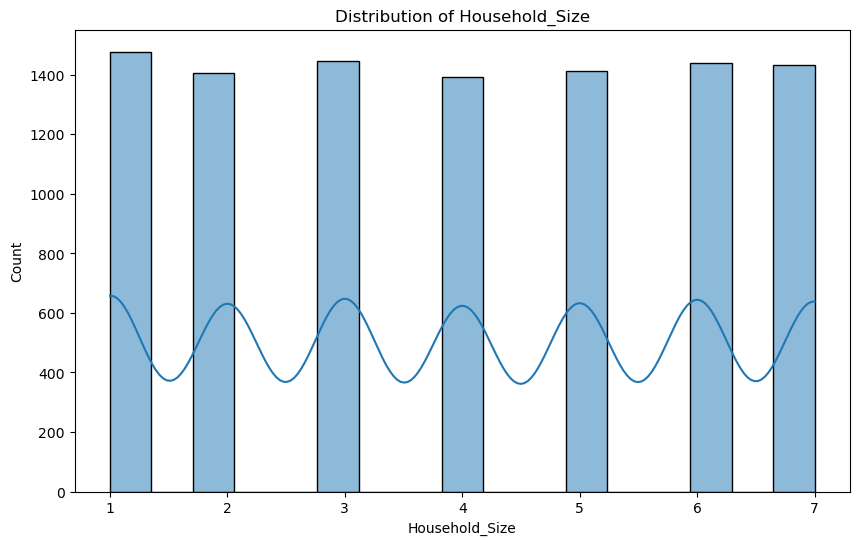

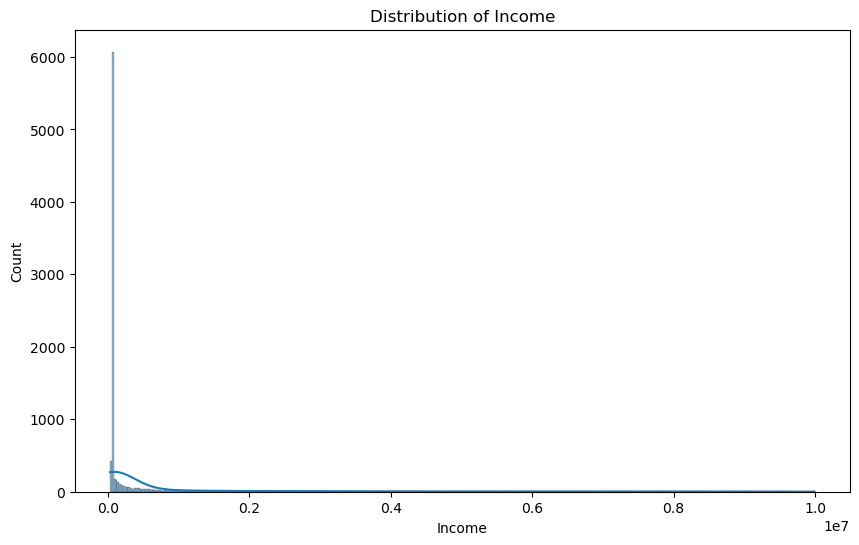

In [8]:
for var in numerical_var:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()

Distribution of age and distribution of work experience is not normal distribution.

In [6]:
df["Age_rank"] = rankdata(df["Age"])
df["Age_rank_norm"] = norm.ppf((df['Age_rank'] - 0.5) / len(df['Age_rank']))

df["Work_Experience_rank"] = rankdata(df["Work_Experience"])
df["Work_Experience_rank_norm"] = norm.ppf((df["Work_Experience_rank"] - 0.5) / len(df["Work_Experience_rank"]))

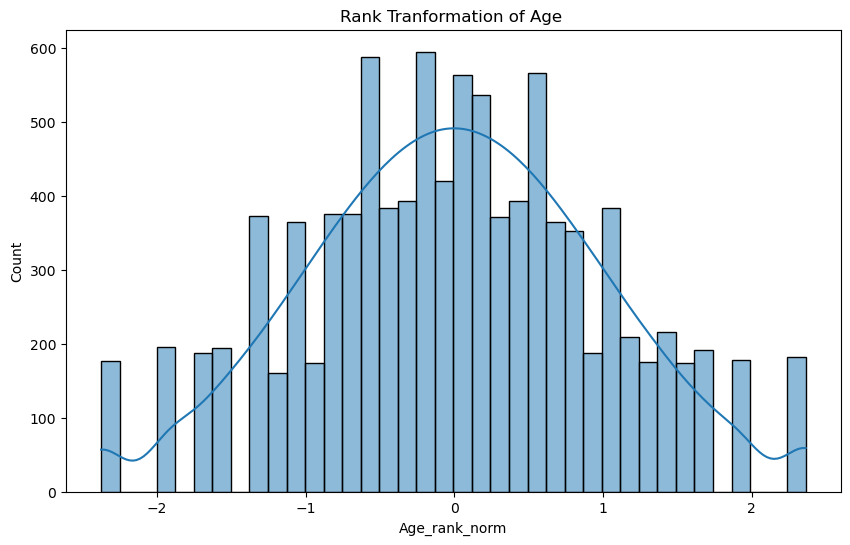

Text(0.5, 1.0, 'Rank transformation of Work Experience')

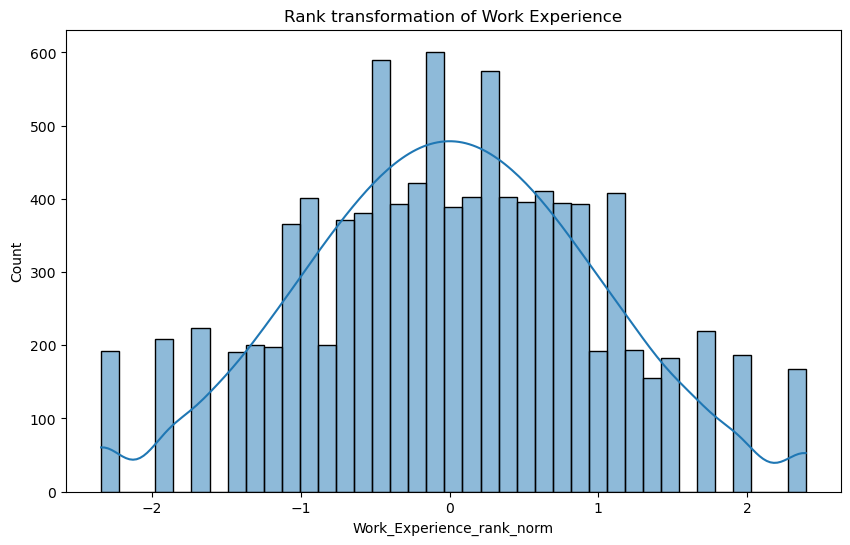

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age_rank_norm"], kde=True)
plt.title("Rank Tranformation of Age ")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df["Work_Experience_rank_norm"], kde=True)
plt.title("Rank transformation of Work Experience")

Rank Transformation normalizes both columns better than Quantile Transformation. Logarithmic, square root and box-cox tranformations gave the bad results.

In [7]:
df.drop(["Age", "Age_rank", "Work_Experience_rank", "Work_Experience"], axis=1, inplace=True)

In [8]:
df.head()

Education_Level  Occupation  Number_of_Dependents Location Marital_Status  \
0        Master's  Technology                     5    Urban        Married   
1     High School     Finance                     0    Urban         Single   
2      Bachelor's  Technology                     1    Urban         Single   
3     High School      Others                     2    Urban        Married   
4      Bachelor's     Finance                     3    Urban        Married   

  Employment_Status  Household_Size Homeownership_Status     Type_of_Housing  \
0         Full-time               7                  Own           Apartment   
1         Full-time               7                  Own           Apartment   
2         Full-time               7                  Own  Single-family home   
3         Full-time               1                  Own           Apartment   
4     Self-employed               4                  Own           Townhouse   

   Gender Primary_Mode_of_Transportation  Income  Age_rank_norm  \
0    Male                 Public transit   72510       0.609490   
1    Male                         Biking   75462       1.925235   
2  Female                            Car   71748       0.105348   
3  Female                            Car   74520      -0.620847   
4    Male                        Walking  640210       0.849146   

   Work_Experience_rank_norm  
0                  -0.194863  
1                  -1.331575  
2                  -1.886705  
3                   0.356989  
4                  -0.515076

### Bivariate Analysis

In [74]:
numerical_var = list(df.select_dtypes(exclude="object").columns)

Numerical vs Numerical bivariate analysis

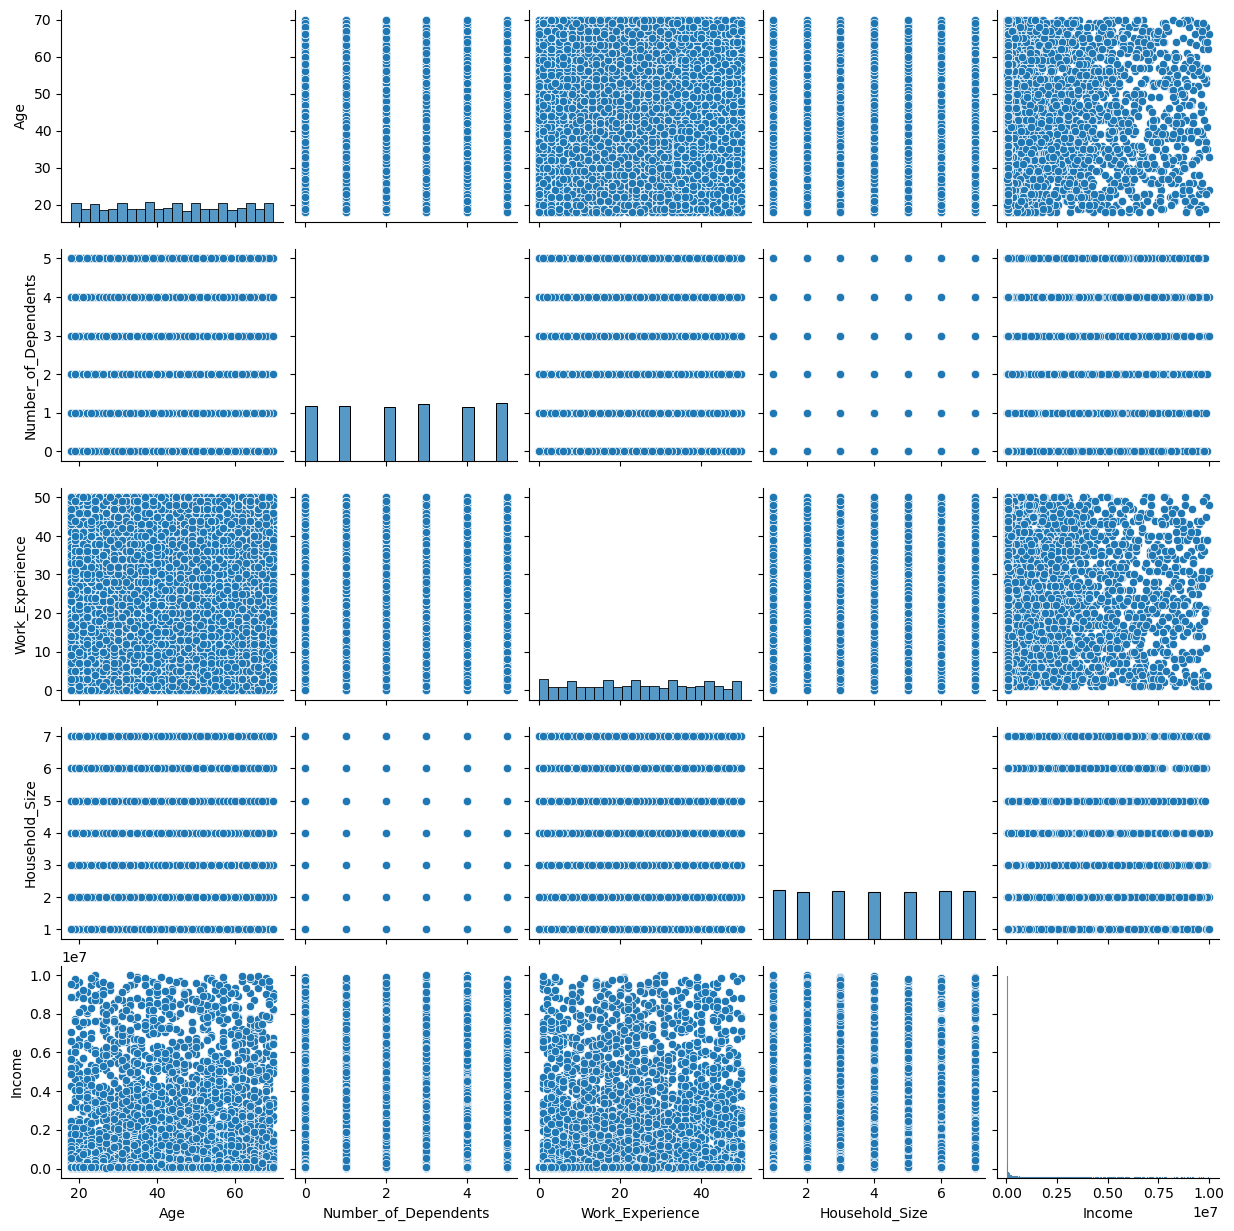

In [12]:
sns.pairplot(df[numerical_var])
plt.show()

Numerical vs Categorical Bivariate Analysis

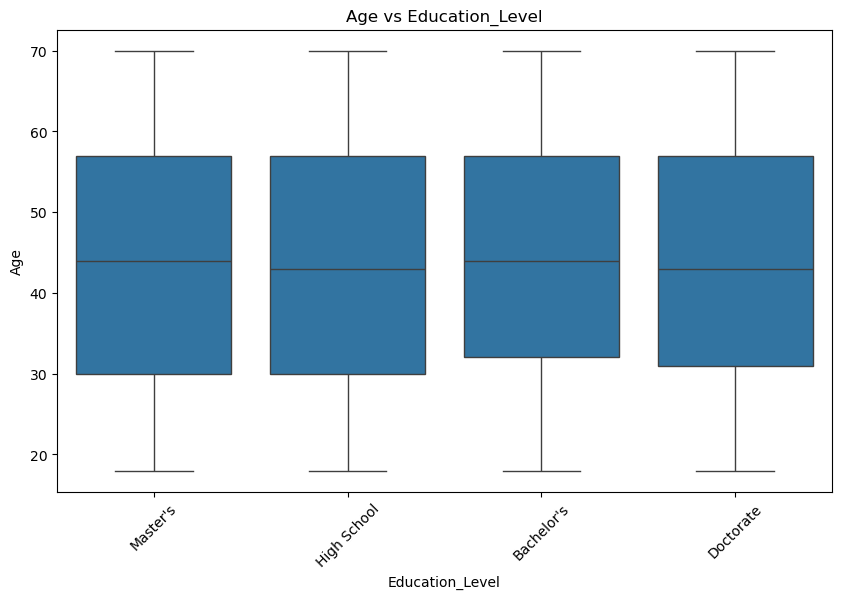

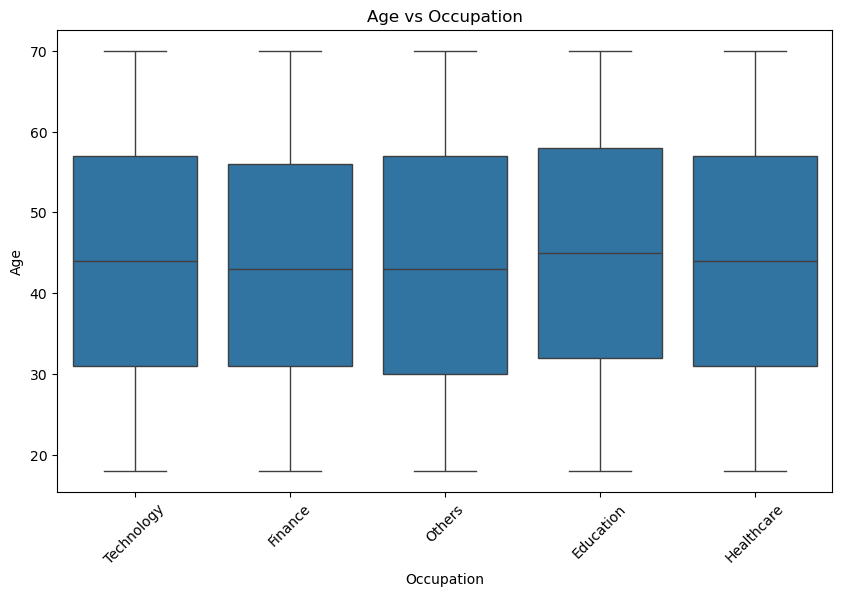

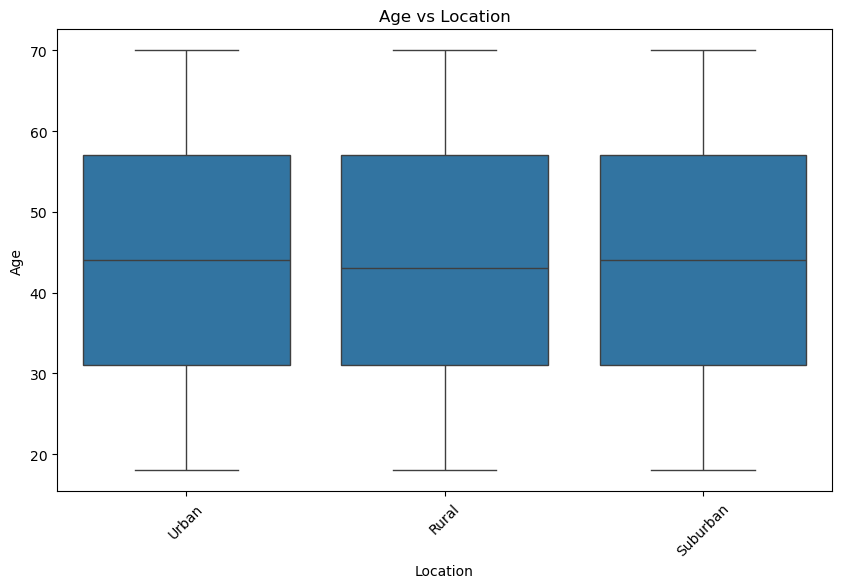

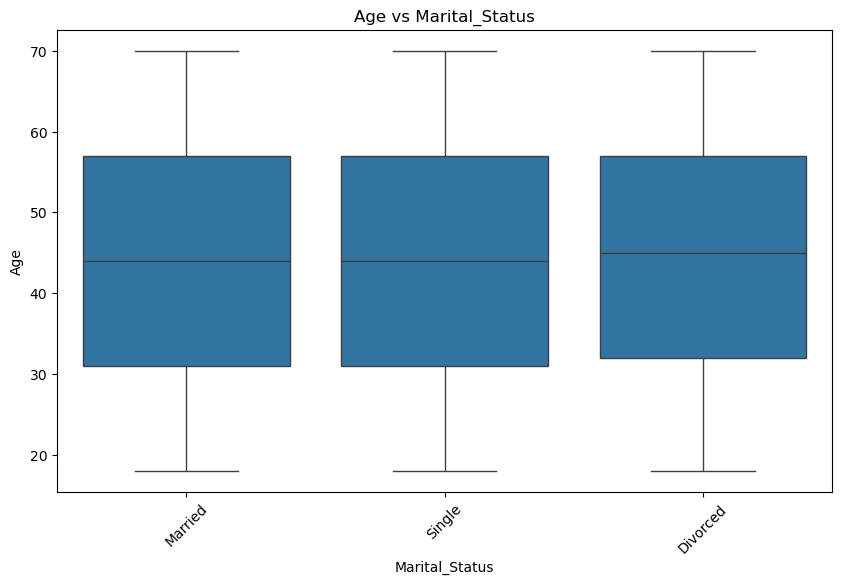

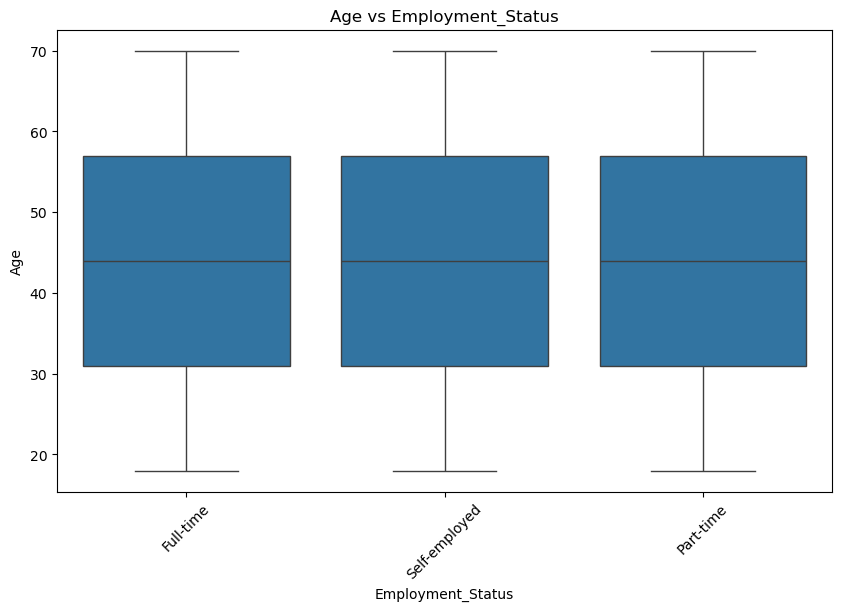

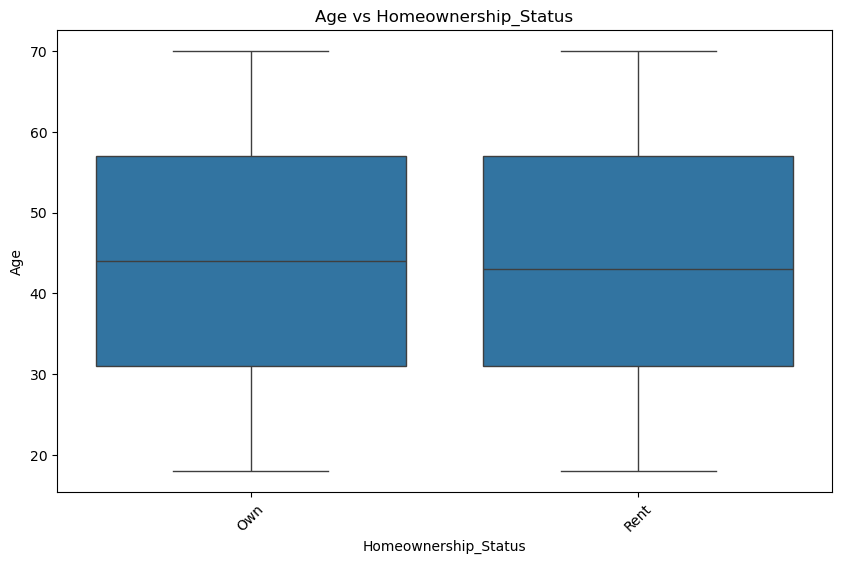

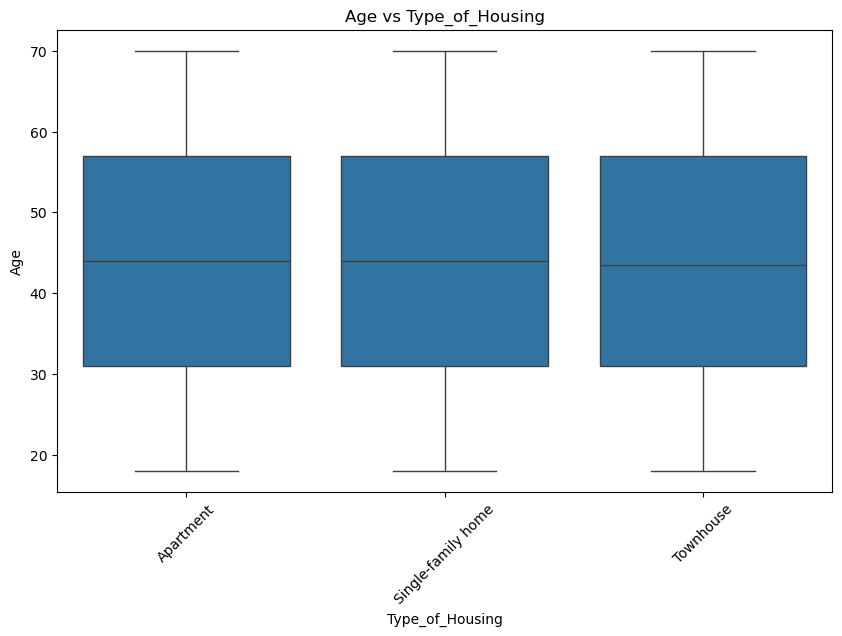

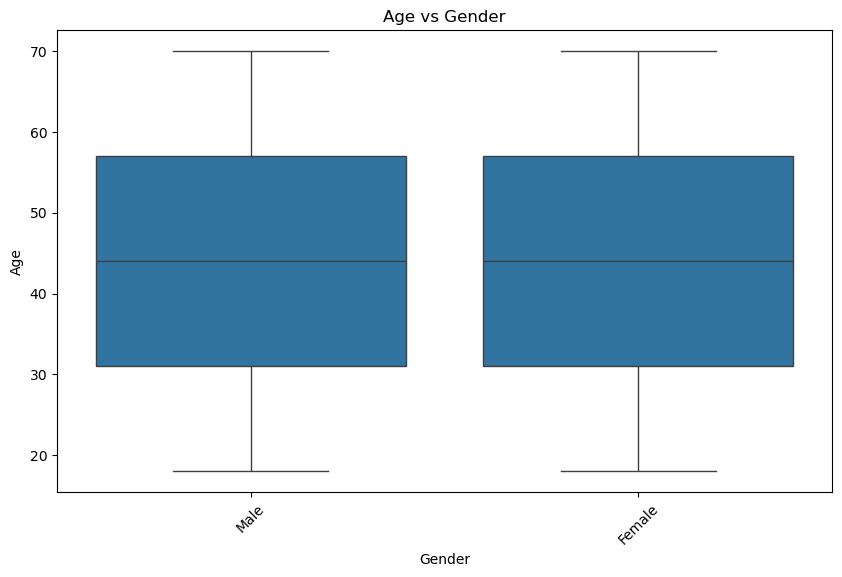

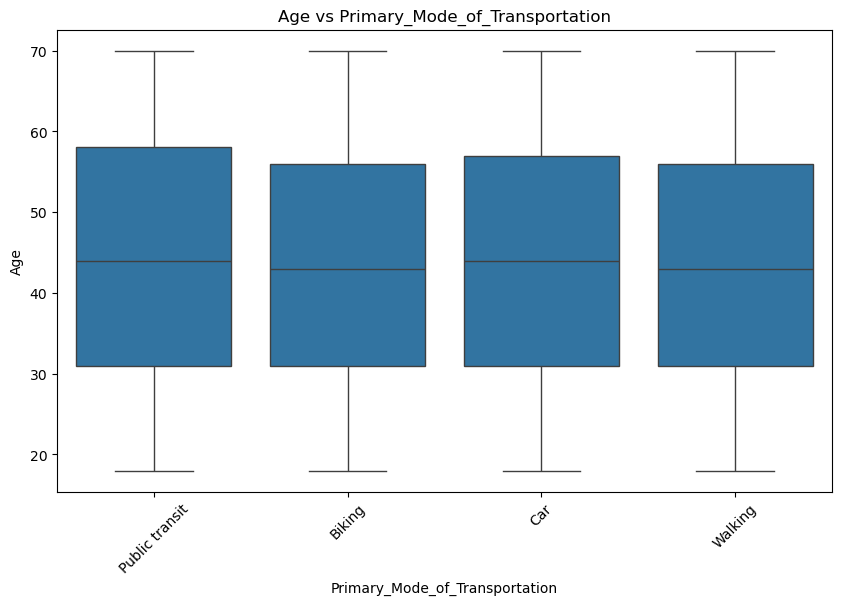

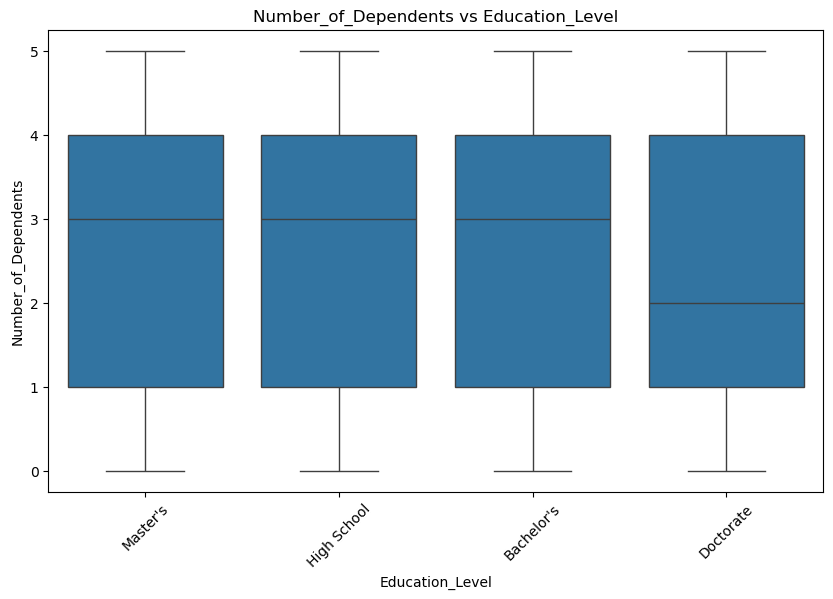

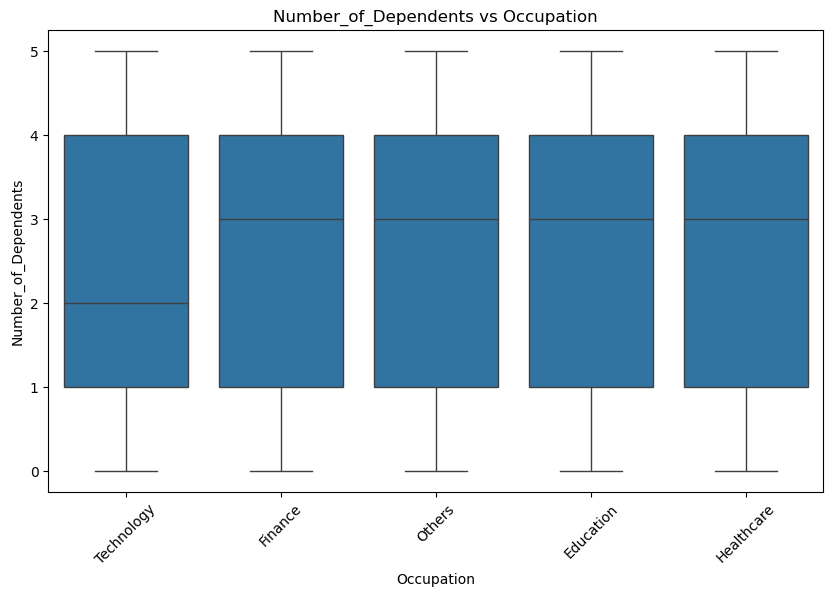

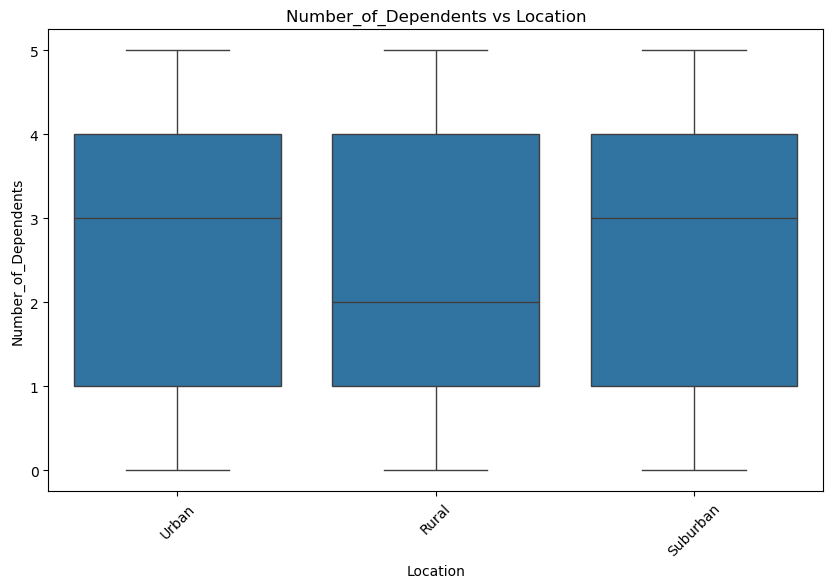

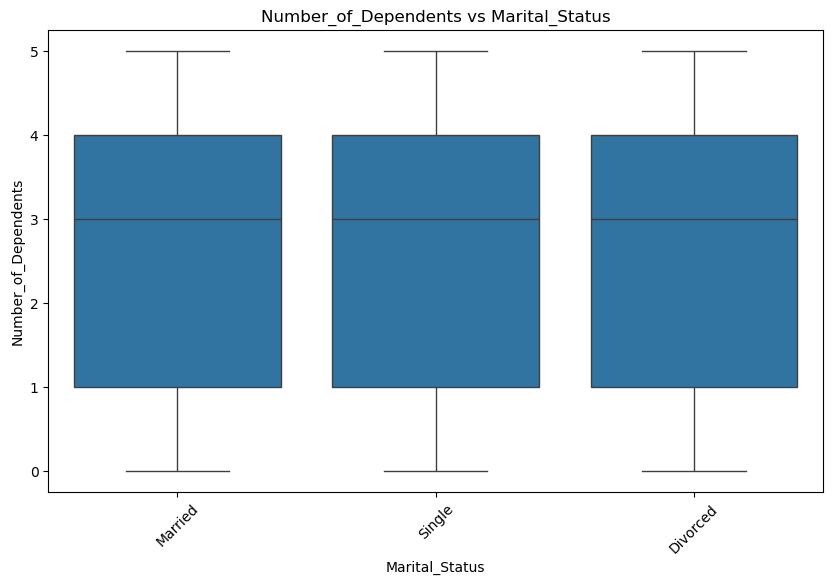

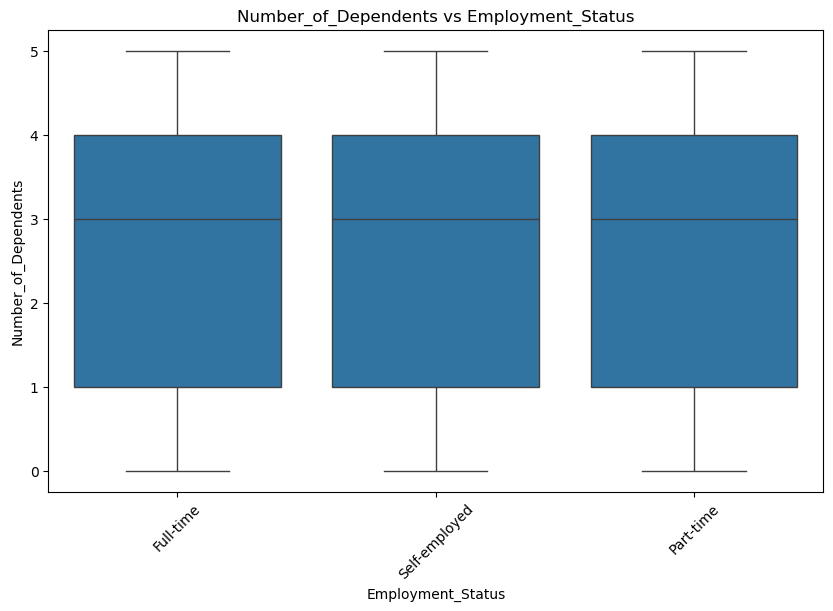

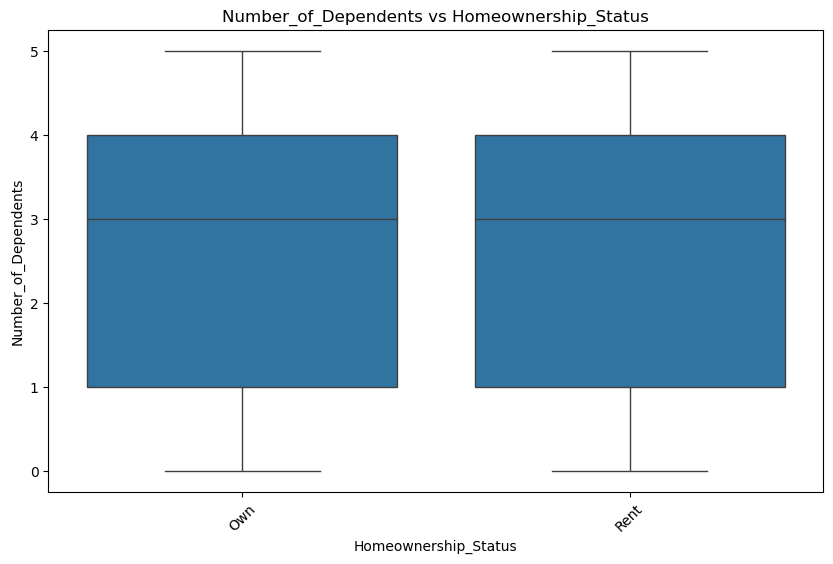

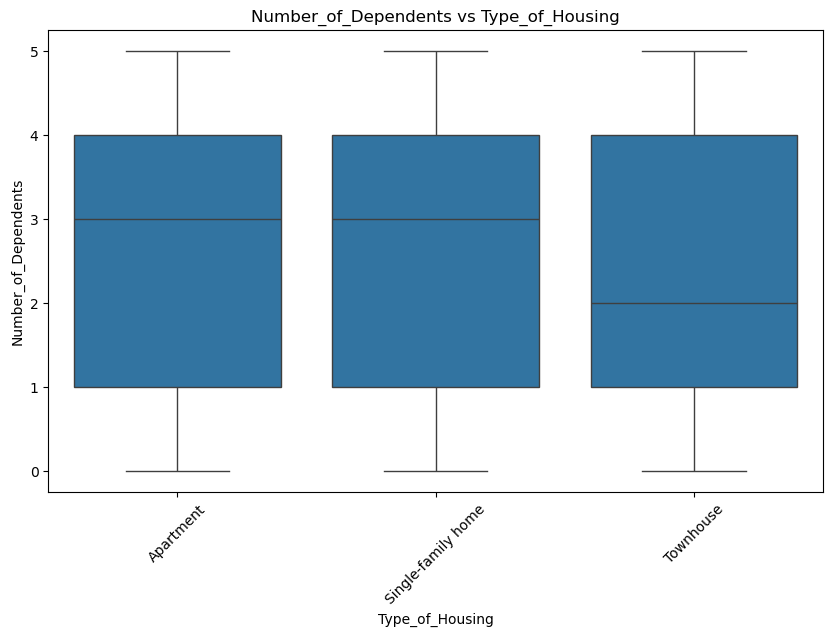

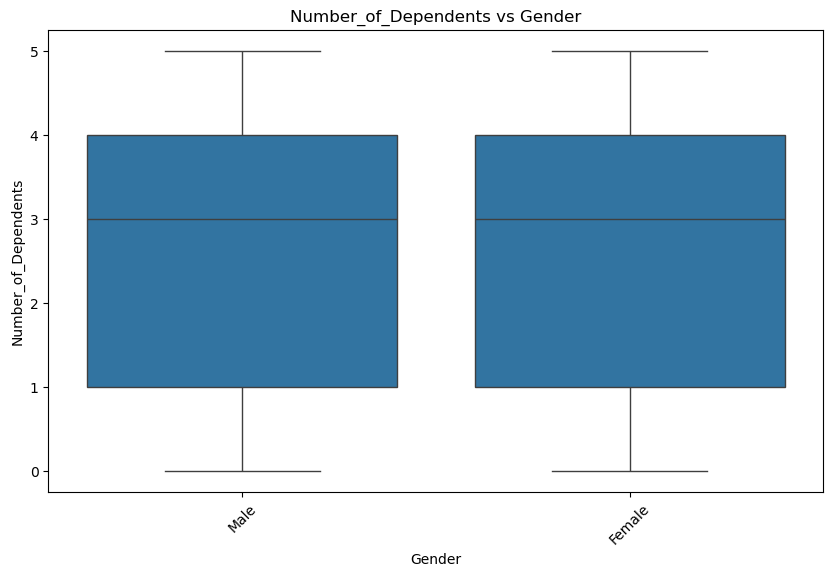

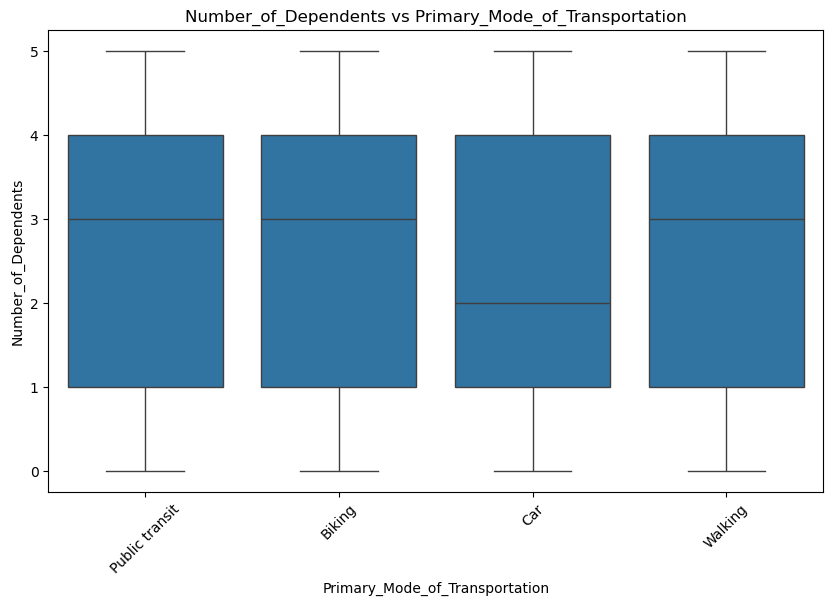

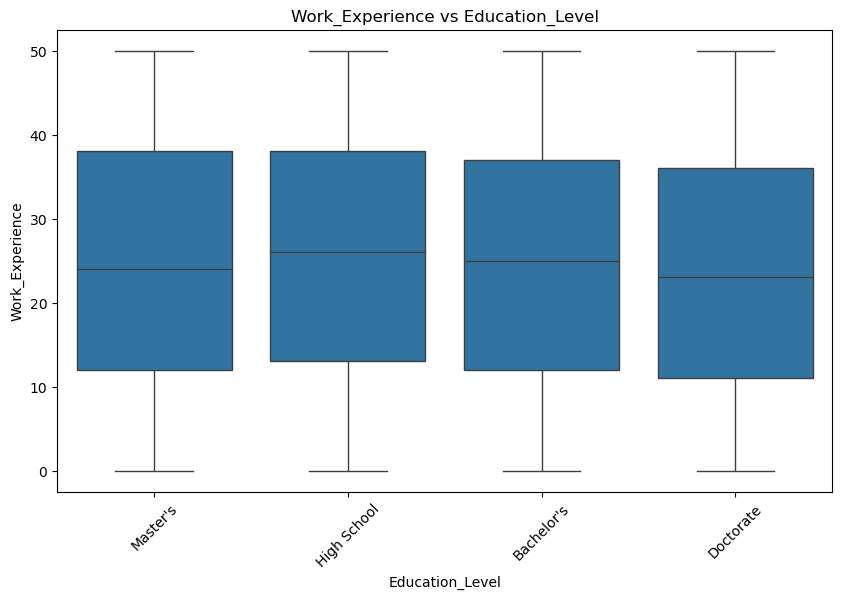

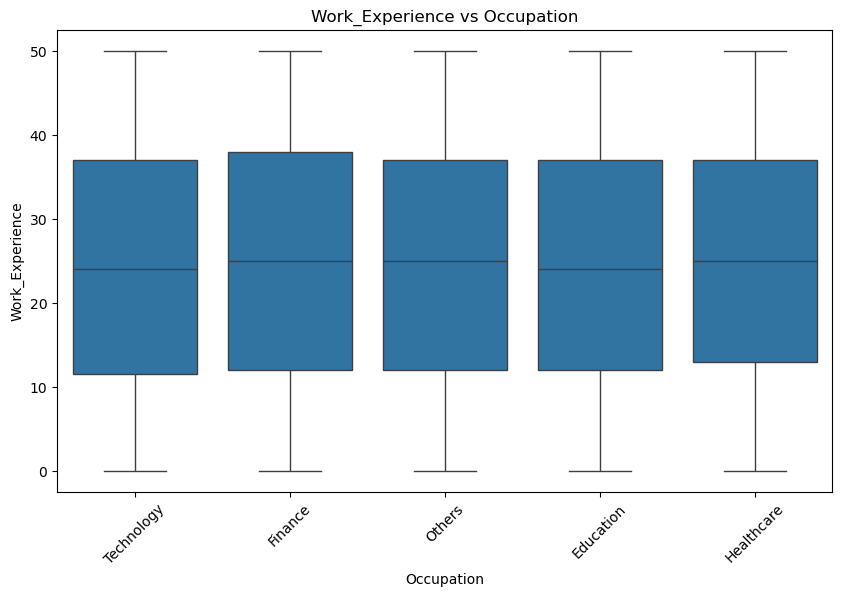

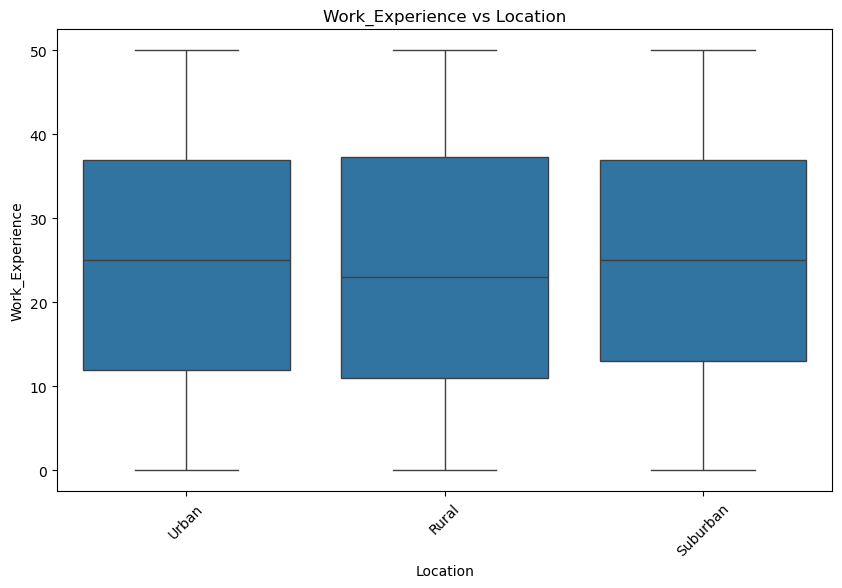

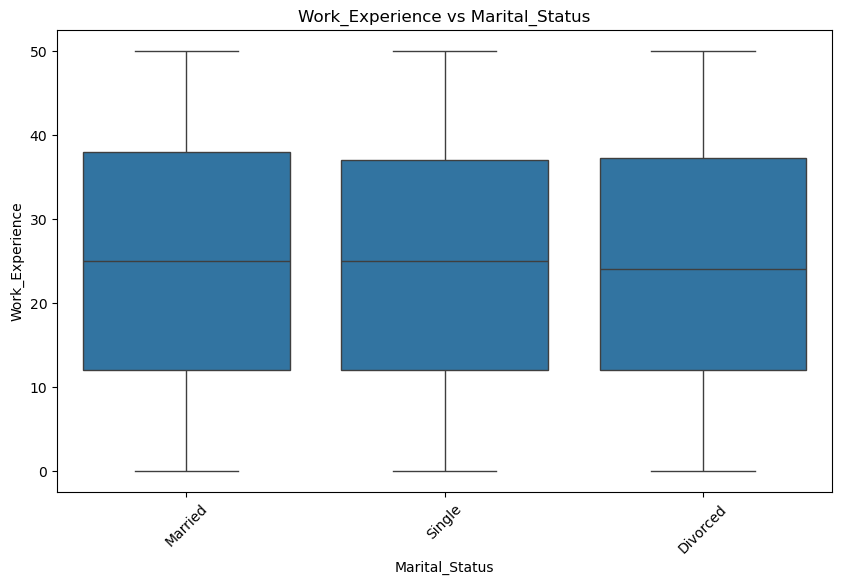

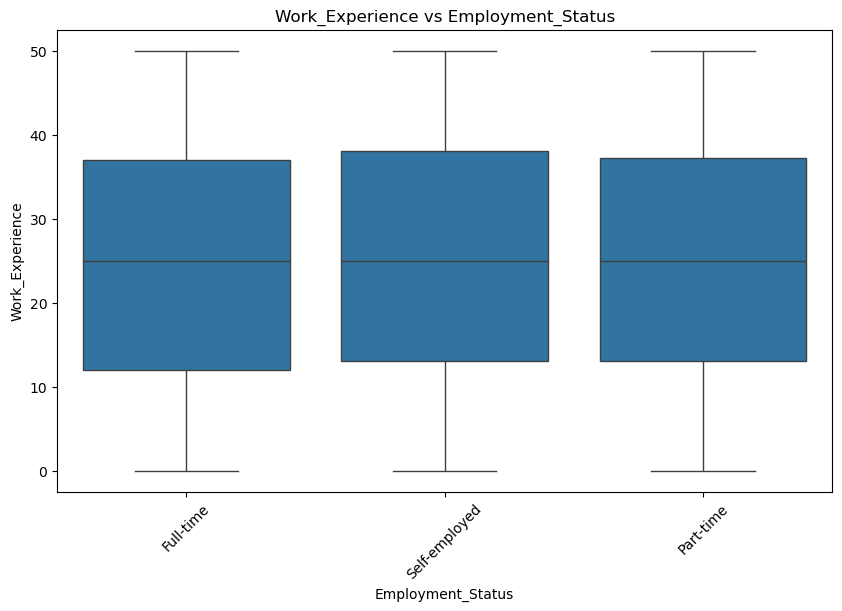

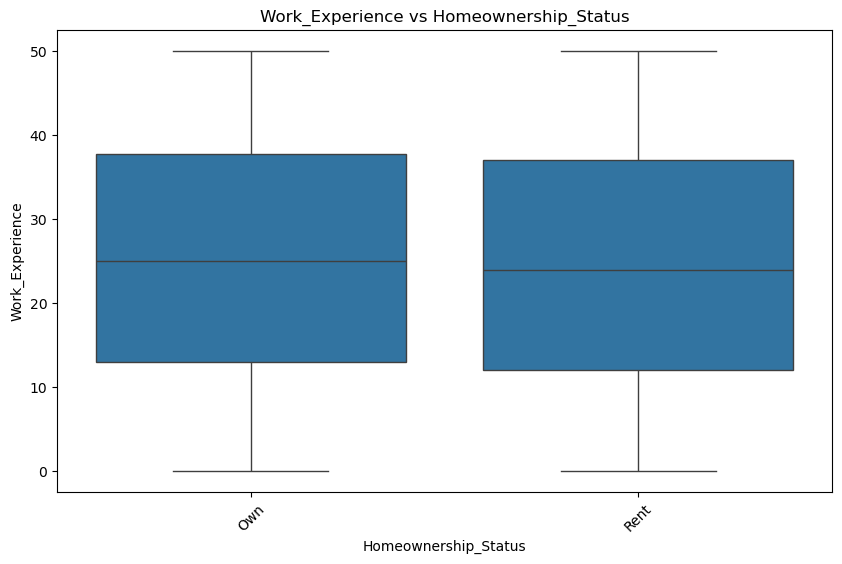

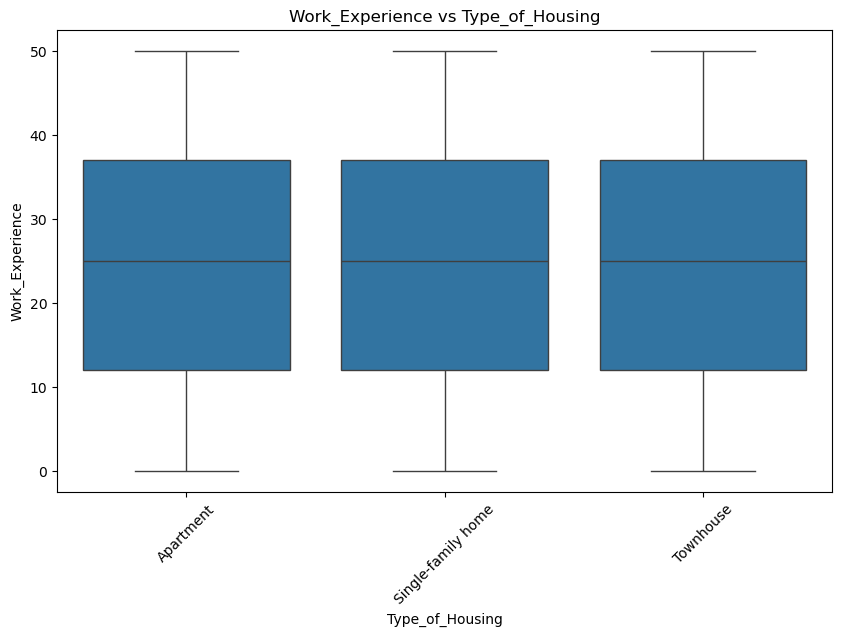

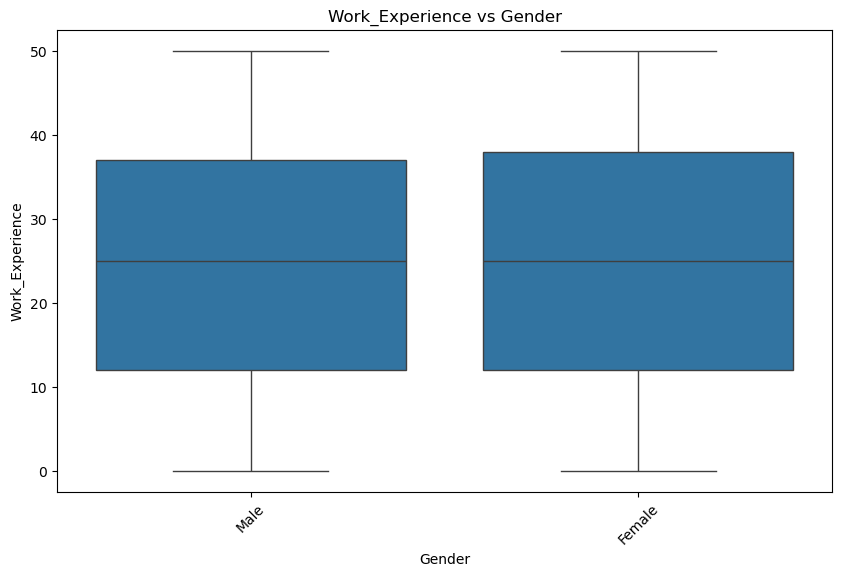

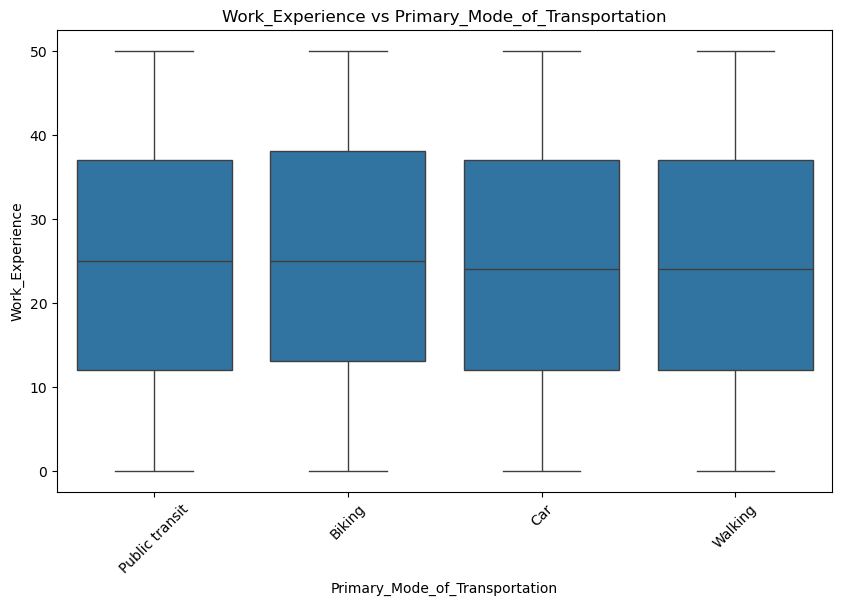

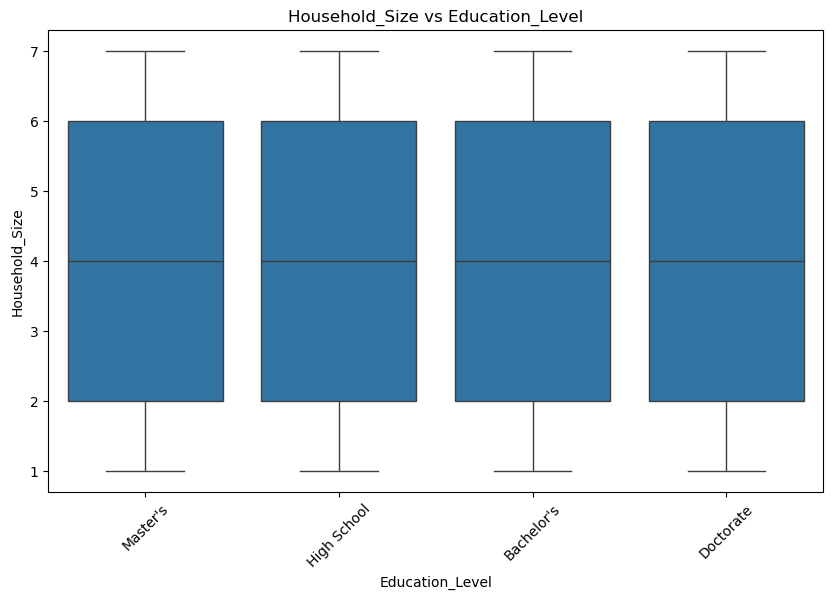

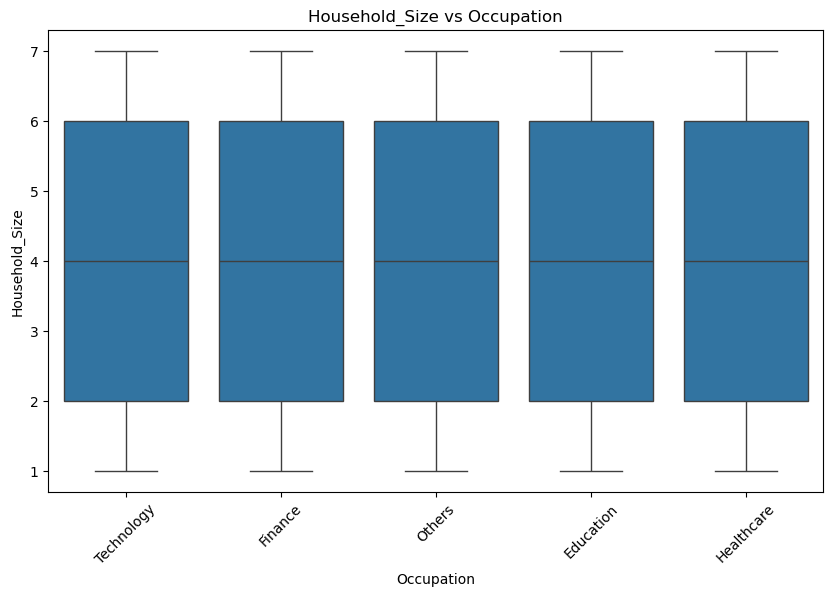

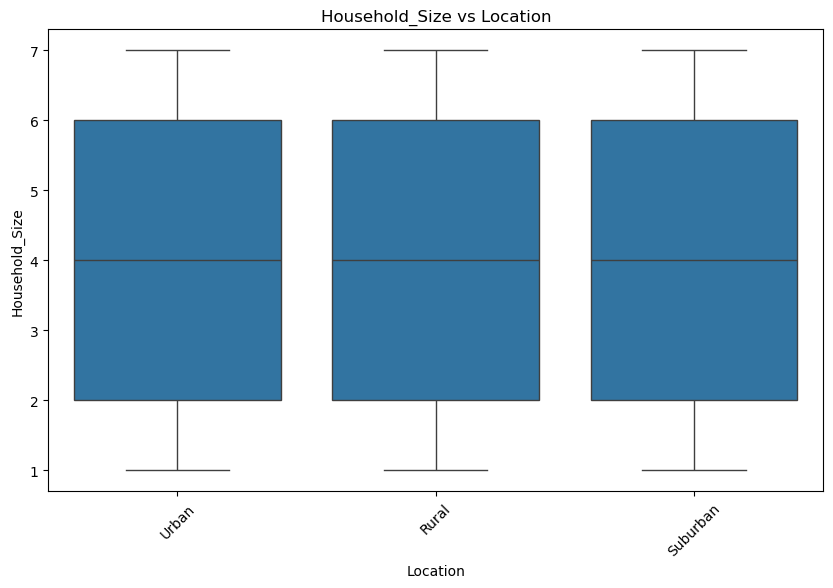

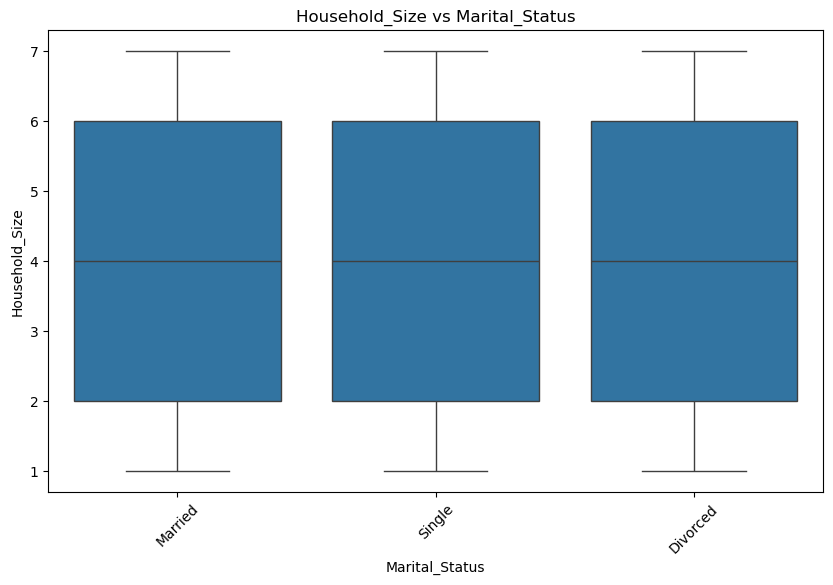

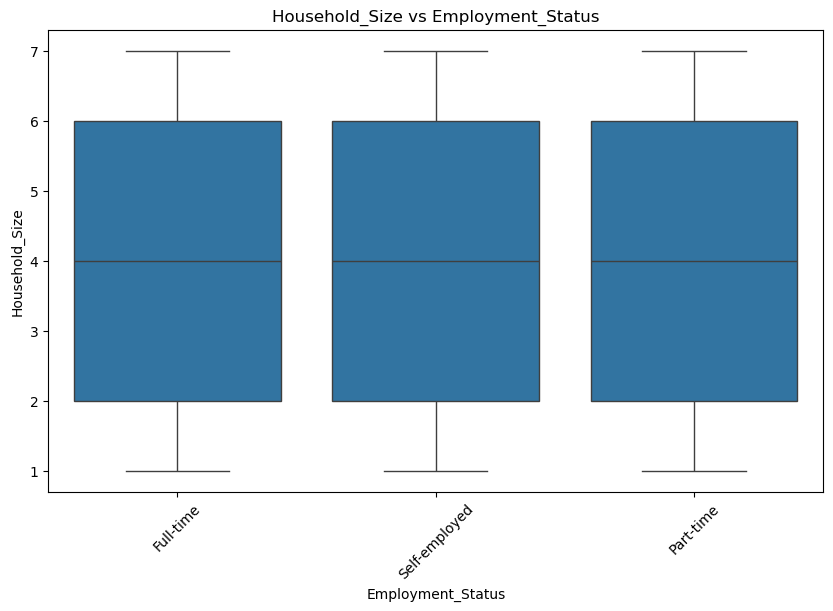

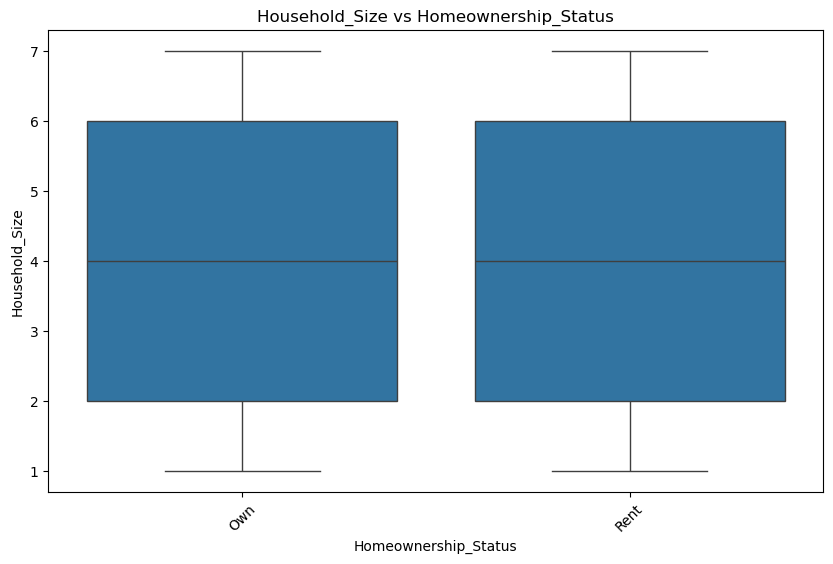

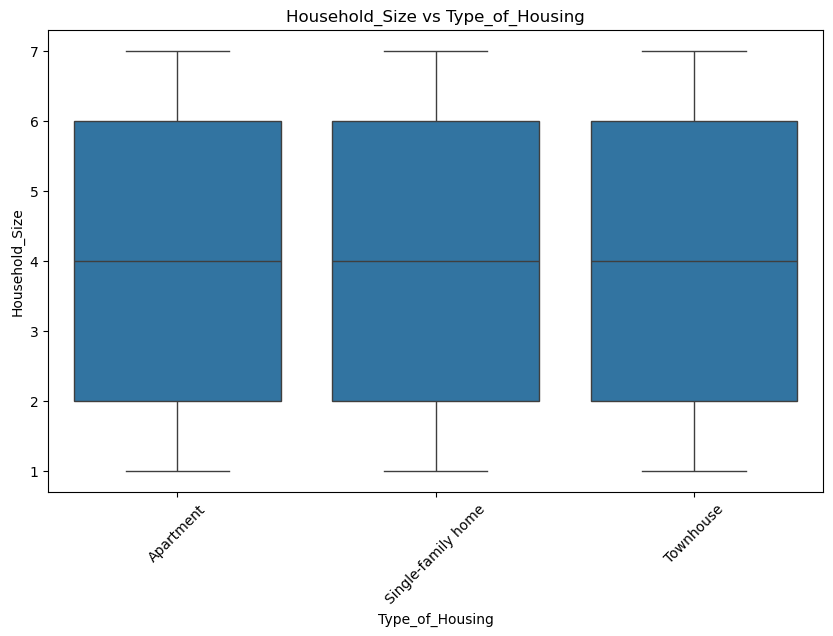

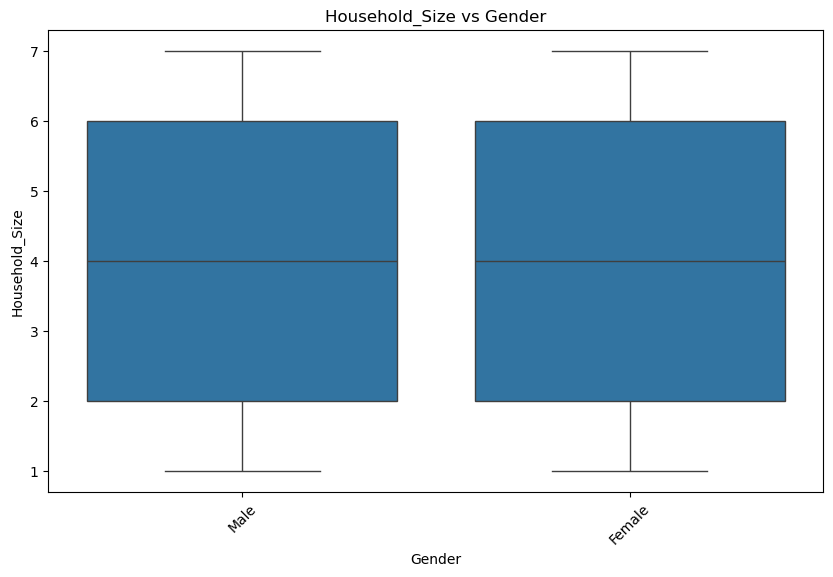

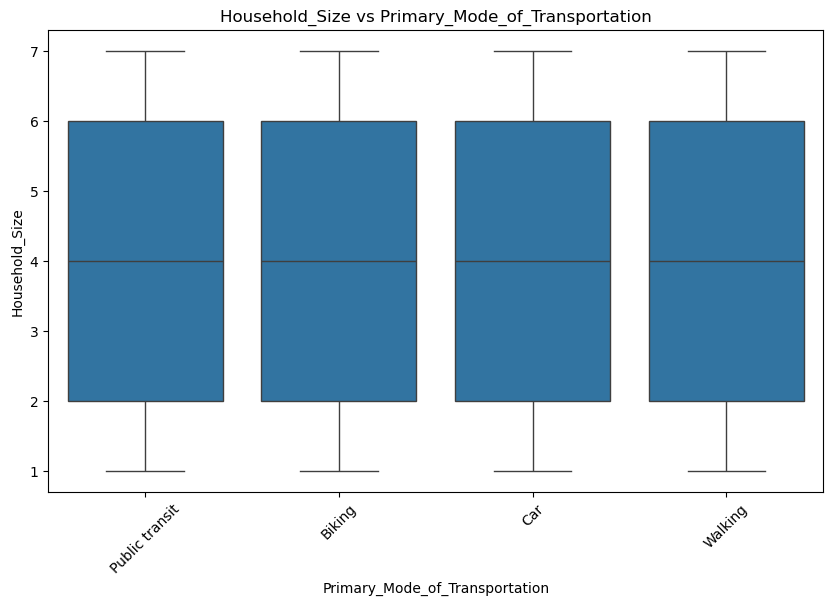

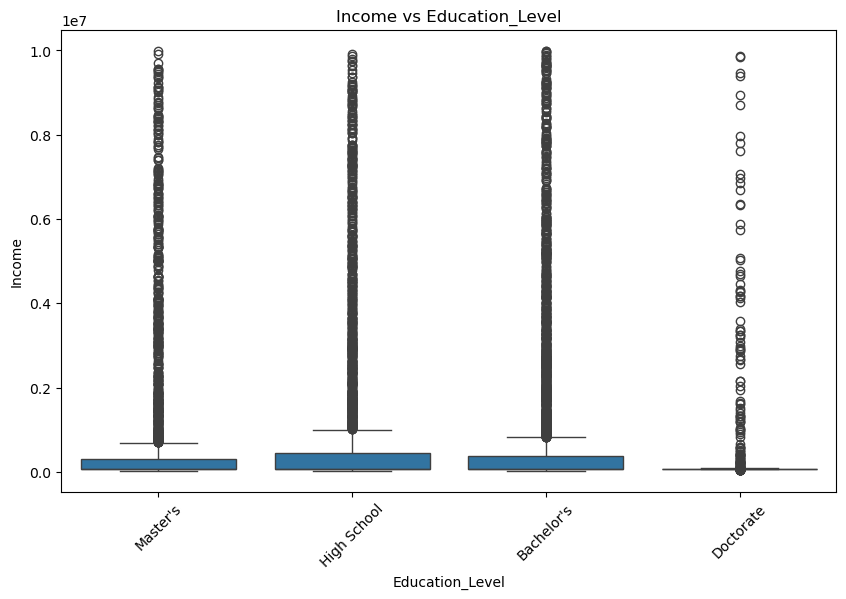

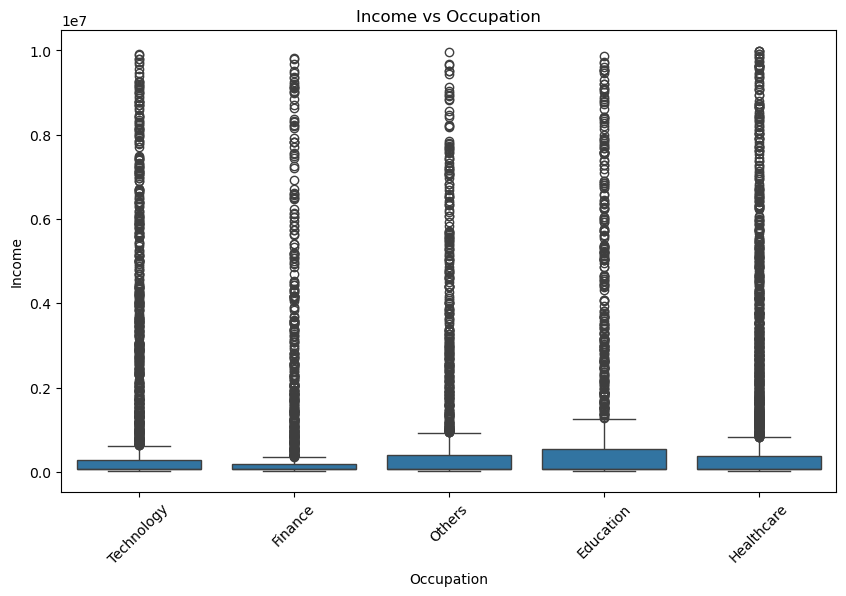

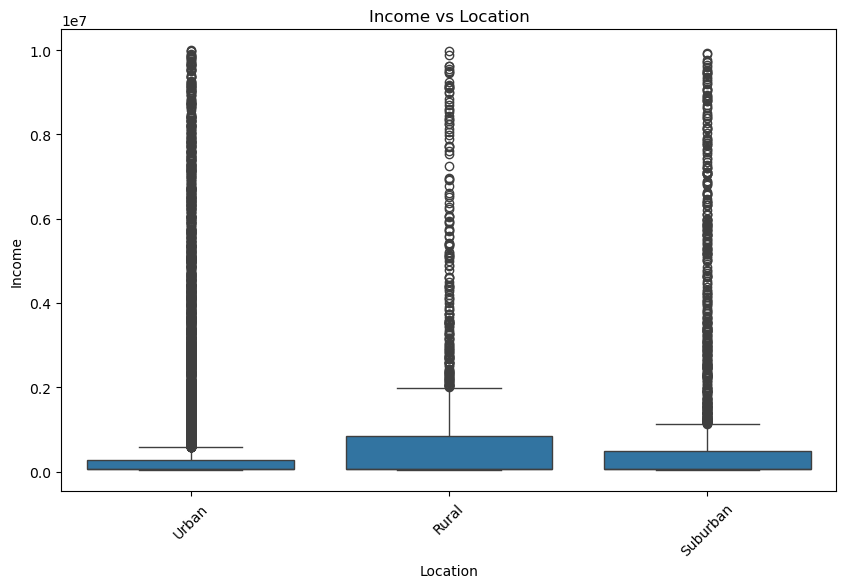

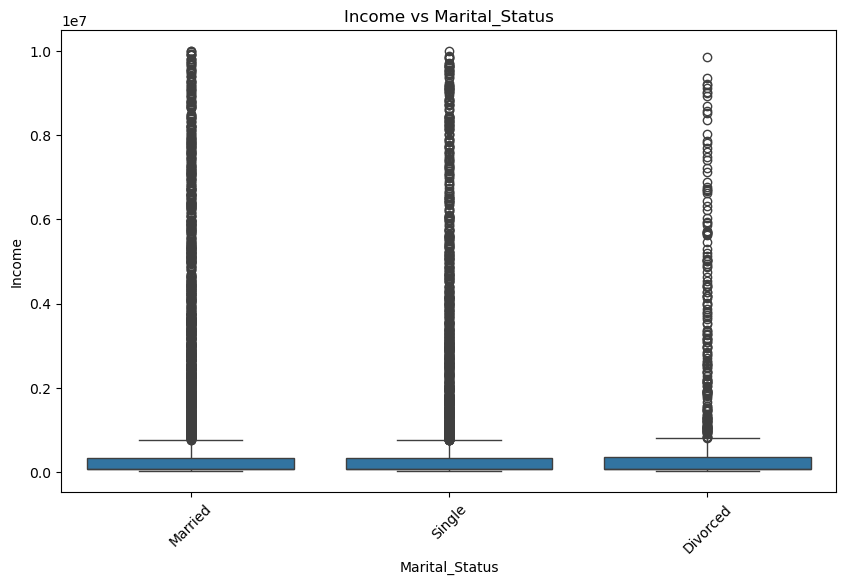

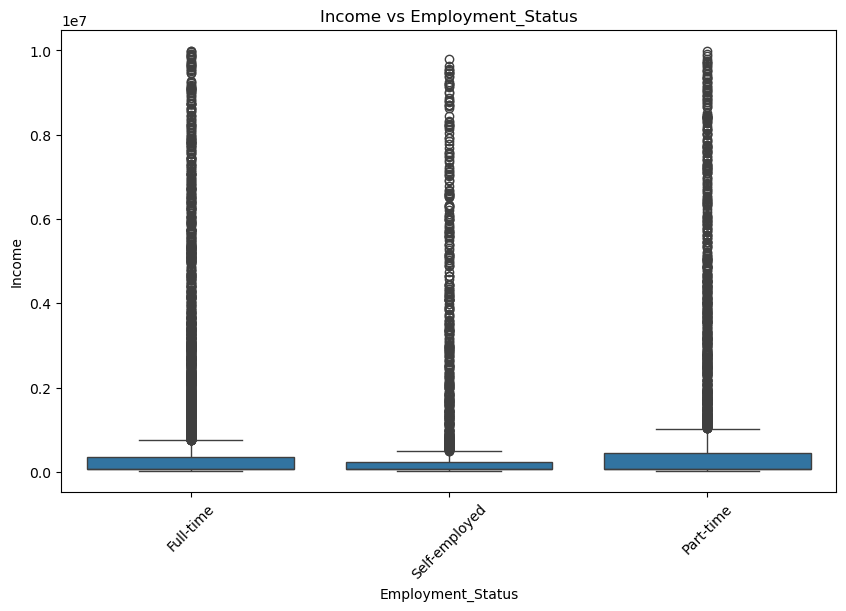

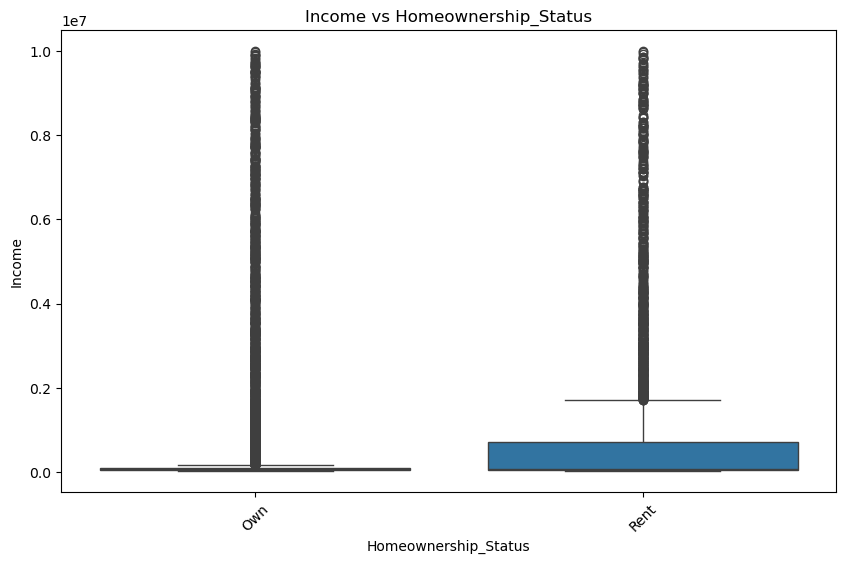

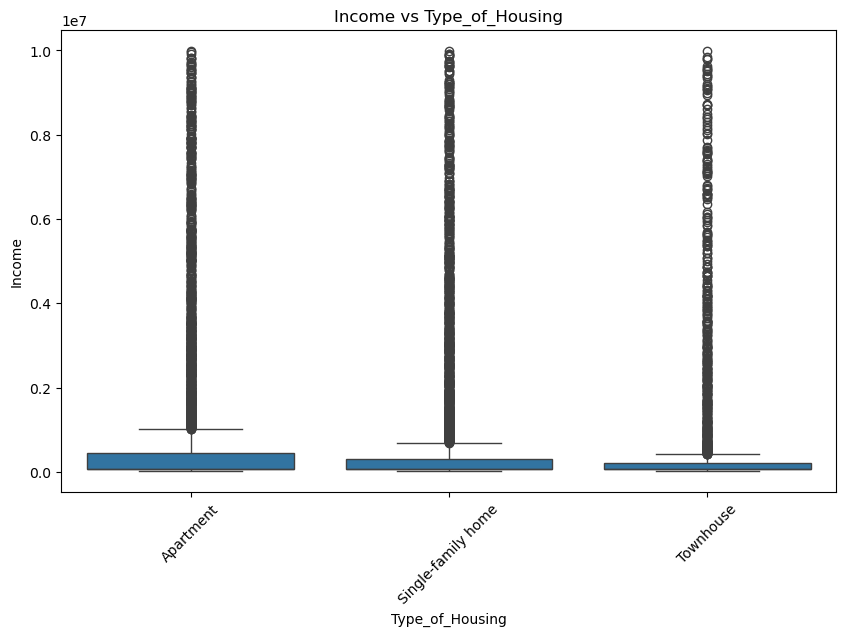

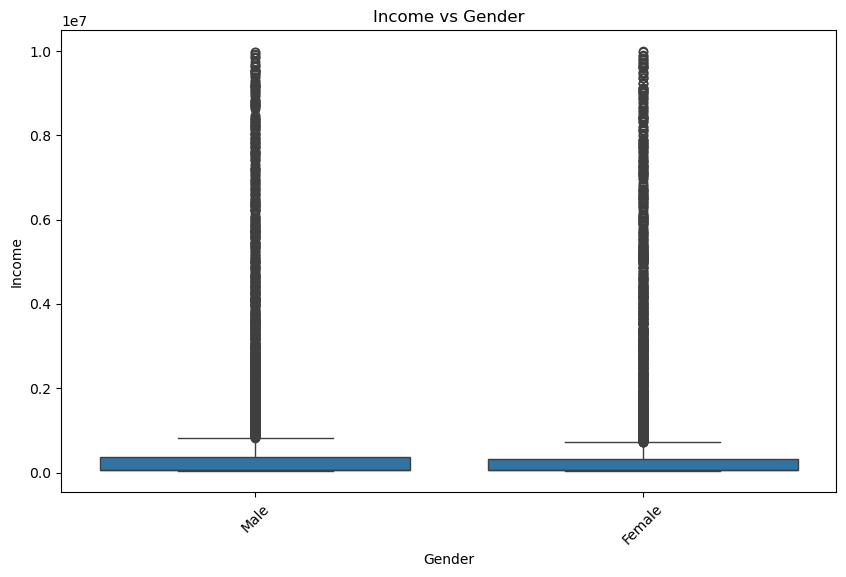

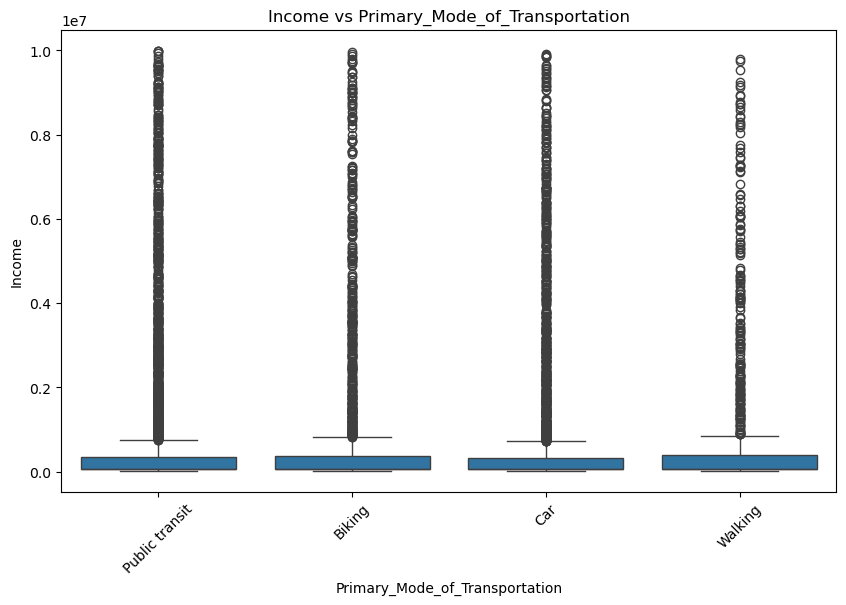

In [13]:
for num_var in numerical_var:
    for cat_var in categorical_var:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_var, y=num_var, data=df)
        plt.title(f"{num_var} vs {cat_var}")
        plt.xticks(rotation = 45)
        plt.show()

Categorical vs. Categorical Bivariate Analysis 

In [15]:
for i in range (len(categorical_var)):
    for j in range (i+1, len(categorical_var)):
        cont_table = pd.crosstab(df[categorical_var[i]], df[categorical_var[j]])
        chi2, p, dof, ex = chi2_contingency(cont_table)
        print(f"Chi-square test between {categorical_var[i]} and {categorical_var[j]}: p-value = {p}")

Chi-square test between Education_Level and Occupation: p-value = 0.959455656133419
Chi-square test between Education_Level and Location: p-value = 0.4900372287604301
Chi-square test between Education_Level and Marital_Status: p-value = 0.7551277958676024
Chi-square test between Education_Level and Employment_Status: p-value = 0.5088529953687531
Chi-square test between Education_Level and Homeownership_Status: p-value = 0.5179637180499803
Chi-square test between Education_Level and Type_of_Housing: p-value = 0.4131251613055079
Chi-square test between Education_Level and Gender: p-value = 0.15040730835560553
Chi-square test between Education_Level and Primary_Mode_of_Transportation: p-value = 0.45749468000110727
Chi-square test between Occupation and Location: p-value = 0.21952165858019682
Chi-square test between Occupation and Marital_Status: p-value = 0.7243958225902114
Chi-square test between Occupation and Employment_Status: p-value = 0.0953328787807282
Chi-square test between Occup

There is a strong association between employment status and type of housing.
There is a borderline significant association between occupation and employment status.
There is a borderline significant association between type of housing and gender.

### Multivariate Analysis 

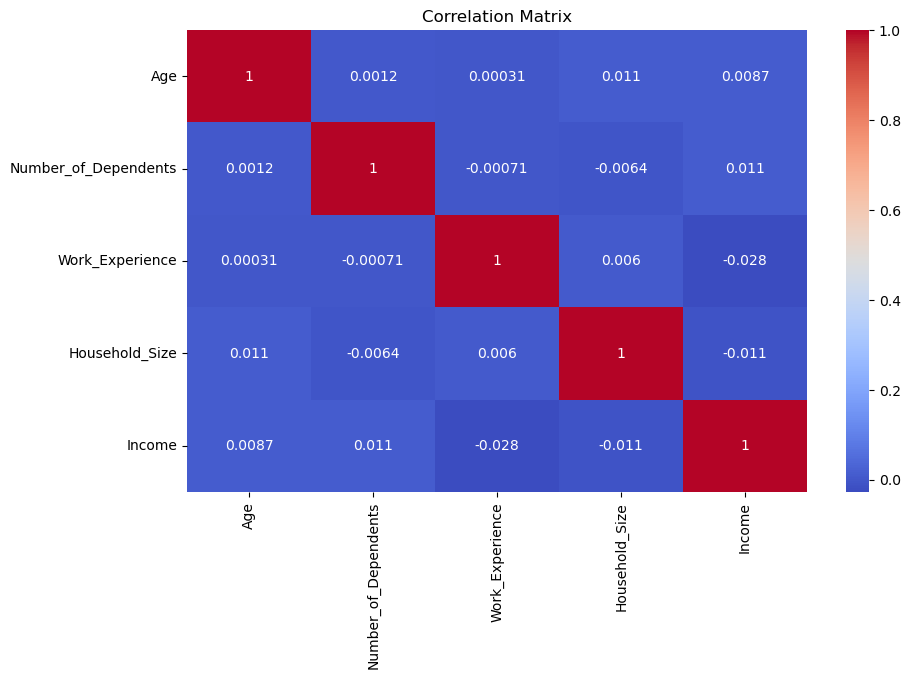

In [17]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10000 non-null  int64  
 1   Education_Level                 10000 non-null  object 
 2   Occupation                      10000 non-null  object 
 3   Number_of_Dependents            10000 non-null  int64  
 4   Location                        10000 non-null  object 
 5   Work_Experience                 10000 non-null  int64  
 6   Marital_Status                  10000 non-null  object 
 7   Employment_Status               10000 non-null  object 
 8   Household_Size                  10000 non-null  int64  
 9   Homeownership_Status            10000 non-null  object 
 10  Type_of_Housing                 10000 non-null  object 
 11  Gender                          10000 non-null  object 
 12  Primary_Mode_of_Transportation  1

In [4]:
df.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [5]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [6]:
df["Education_Level"].unique()

array(["Master's", 'High School', "Bachelor's", 'Doctorate'], dtype=object)

In [7]:
df["Occupation"].unique()

array(['Technology', 'Finance', 'Others', 'Education', 'Healthcare'],
      dtype=object)

In [8]:
df["Location"].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [9]:
df["Marital_Status"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [10]:
df["Employment_Status"].unique()

array(['Full-time', 'Self-employed', 'Part-time'], dtype=object)

In [11]:
df["Homeownership_Status"].unique()

array(['Own', 'Rent'], dtype=object)

In [12]:
df["Type_of_Housing"].unique()

array(['Apartment', 'Single-family home', 'Townhouse'], dtype=object)

In [13]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df["Primary_Mode_of_Transportation"].unique()

array(['Public transit', 'Biking', 'Car', 'Walking'], dtype=object)

### Encoding

In [9]:
df = pd.get_dummies(df, columns=["Education_Level", "Occupation", "Location", "Marital_Status", "Employment_Status",
                   "Homeownership_Status", "Type_of_Housing", "Gender", "Primary_Mode_of_Transportation"], dtype=int8)

In [10]:
df

Number_of_Dependents  Household_Size   Income  Age_rank_norm  \
0                        5               7    72510       0.609490   
1                        0               7    75462       1.925235   
2                        1               7    71748       0.105348   
3                        2               1    74520      -0.620847   
4                        3               4   640210       0.849146   
...                    ...             ...      ...            ...   
9995                     0               6    74994       0.726553   
9996                     3               1    72676      -1.262136   
9997                     3               4  2684820      -0.140456   
9998                     0               1    57955       0.008899   
9999                     0               7  1131084      -0.346988   

      Work_Experience_rank_norm  Education_Level_Bachelor's  \
0                     -0.194863                           0   
1                     -1.331575                           0   
2                     -1.886705                           1   
3                      0.356989                           0   
4                     -0.515076                           1   
...                         ...                         ...   
9995                   0.056052                           0   
9996                  -0.459605                           0   
9997                   2.393247                           0   
9998                  -1.461421                           0   
9999                   1.682355                           0   

      Education_Level_Doctorate  Education_Level_High School  \
0                             0                            0   
1                             0                            1   
2                             0                            0   
3                             0                            1   
4                             0                            0   
...                         ...                          ...   
9995                          0                            1   
9996                          0                            0   
9997                          1                            0   
9998                          0                            1   
9999                          0                            1   

      Education_Level_Master's  Occupation_Education  ...  \
0                            1                     0  ...   
1                            0                     0  ...   
2                            0                     0  ...   
3                            0                     0  ...   
4                            0                     0  ...   
...                        ...                   ...  ...   
9995                         0                     0  ...   
9996                         1                     0  ...   
9997                         0                     1  ...   
9998                         0                     1  ...   
9999                         0                     0  ...   

      Homeownership_Status_Rent  Type_of_Housing_Apartment  \
0                             0                          1   
1                             0                          1   
2                             0                          0   
3                             0                          1   
4                             0                          0   
...                         ...                        ...   
9995                          0                          0   
9996                          0                          0   
9997                          0                          0   
9998                          0                          0   
9999                          1                          0   

      Type_of_Housing_Single-family home  Type_of_Housing_Townhouse  \
0                                      0                          0   
1                  

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Number_of_Dependents                           10000 non-null  int64  
 1   Household_Size                                 10000 non-null  int64  
 2   Income                                         10000 non-null  int64  
 3   Age_rank_norm                                  10000 non-null  float64
 4   Work_Experience_rank_norm                      10000 non-null  float64
 5   Education_Level_Bachelor's                     10000 non-null  bool   
 6   Education_Level_Doctorate                      10000 non-null  bool   
 7   Education_Level_High School                    10000 non-null  bool   
 8   Education_Level_Master's                       10000 non-null  bool   
 9   Occupation_Education                           1000

In [25]:
df.corr()["Income"]

Number_of_Dependents                             0.011413
Household_Size                                  -0.011356
Income                                           1.000000
Age_rank_norm                                    0.009981
Work_Experience_rank_norm                       -0.020188
Education_Level_Bachelor's                      -0.002043
Education_Level_Doctorate                       -0.023726
Education_Level_High School                      0.018451
Education_Level_Master's                        -0.005192
Occupation_Education                             0.024099
Occupation_Finance                              -0.025784
Occupation_Healthcare                           -0.006380
Occupation_Others                                0.002822
Occupation_Technology                            0.005978
Location_Rural                                   0.043051
Location_Suburban                                0.028269
Location_Urban                                  -0.052968
Marital_Status

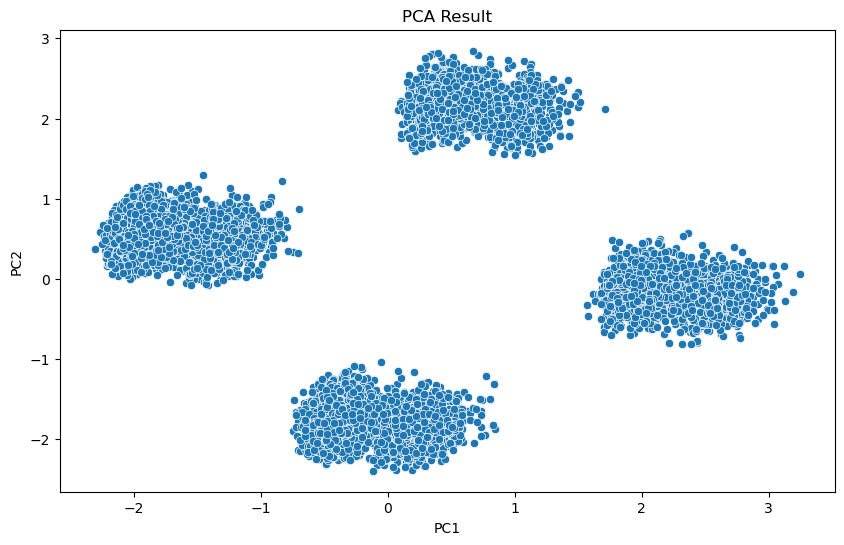

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"])
plt.title("PCA Result")
plt.show()

Explained variance by the first two components: [0.05964634 0.05878266]


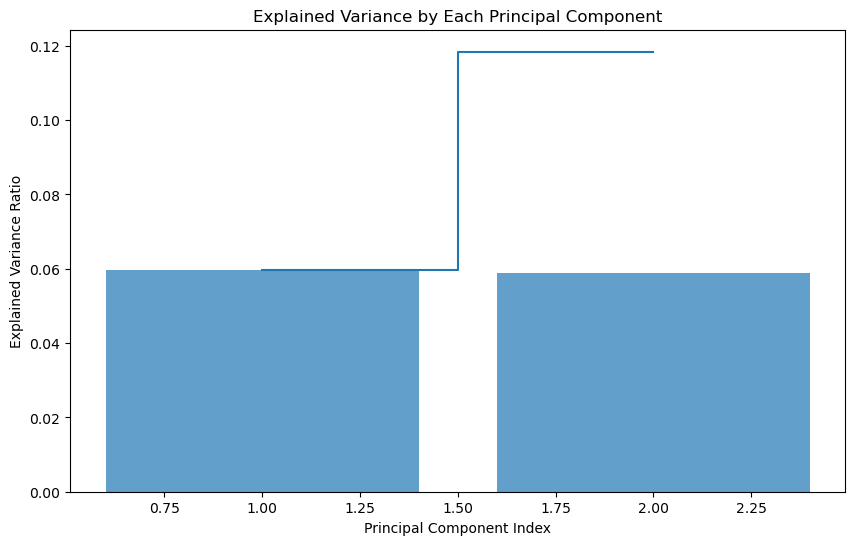

                                                    PC1       PC2
Number_of_Dependents                          -0.016105 -0.021200
Household_Size                                -0.015394 -0.024293
Income                                         0.082972  0.043340
Age_rank_norm                                 -0.015005 -0.009218
Work_Experience_rank_norm                     -0.021333 -0.012078
Education_Level_Bachelor's                    -0.036957 -0.047215
Education_Level_Doctorate                     -0.005706  0.022329
Education_Level_High School                    0.040186  0.017786
Education_Level_Master's                       0.002430  0.023602
Occupation_Education                          -0.006796 -0.020078
Occupation_Finance                             0.022845 -0.025098
Occupation_Healthcare                          0.008859  0.044877
Occupation_Others                              0.002310 -0.028005
Occupation_Technology                         -0.024985  0.013193
Location_R

In [28]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by the first two components: {explained_variance[:2]}')

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

# Principal component loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)
print(loadings)

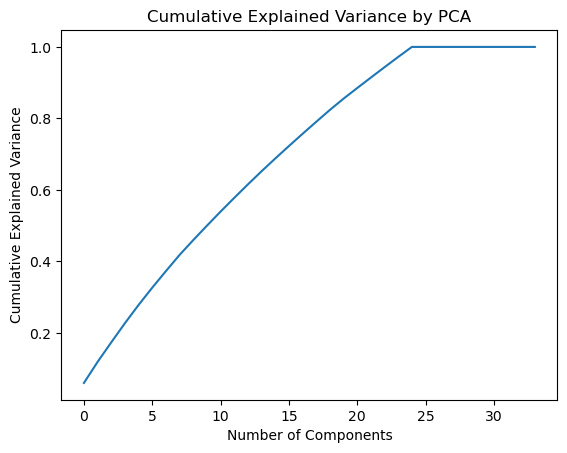

In [29]:
pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.show()

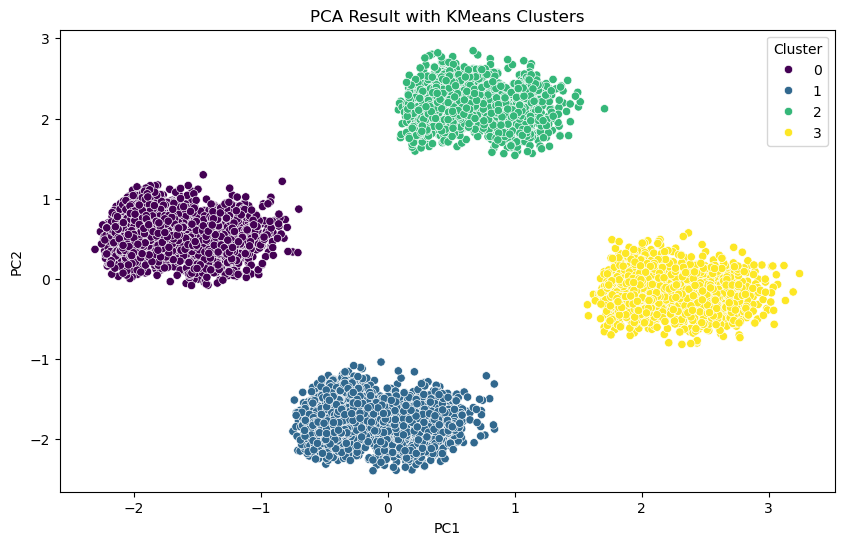

In [30]:
from sklearn.cluster import KMeans

# Assume optimal number of clusters is 4 for illustration
kmeans = KMeans(n_clusters=4)
kmeans.fit(principal_components)
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df['Cluster'], palette='viridis')
plt.title("PCA Result with KMeans Clusters")
plt.show()


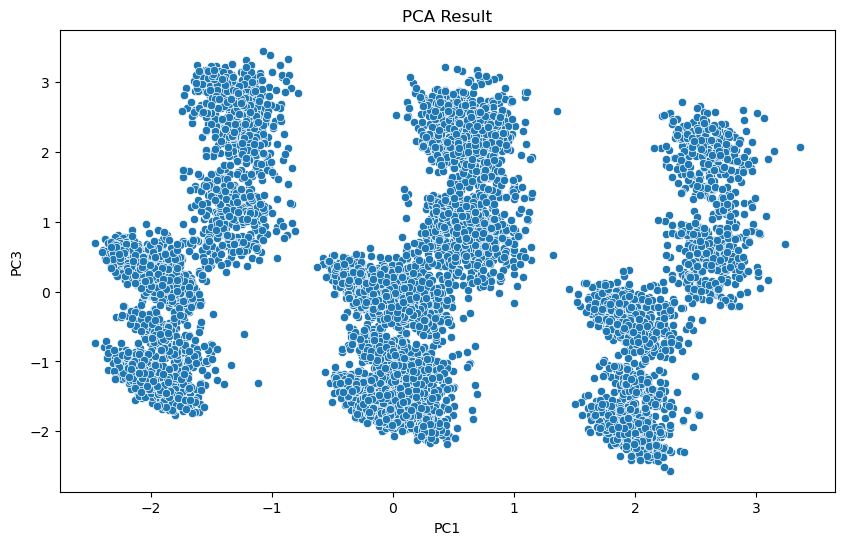

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", 
                                                         "PC7", "PC8", "PC9", "PC10"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC3"])
plt.title("PCA Result")
plt.show()

Explained variance by the first two components: [0.05967831 0.05885944 0.0545179  0.05358169 0.05101763 0.04815372
 0.04621272 0.04479477 0.04134142 0.03946072]


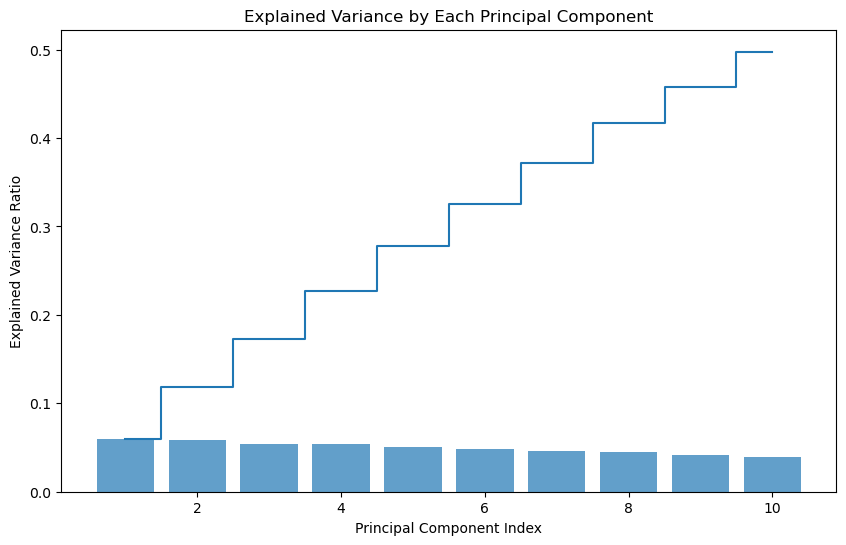

ValueError: Shape of passed values is (34, 10), indices imply (34, 2)

In [34]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by the first two components: {explained_variance[:10]}')

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

# Principal component loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)
print(loadings)

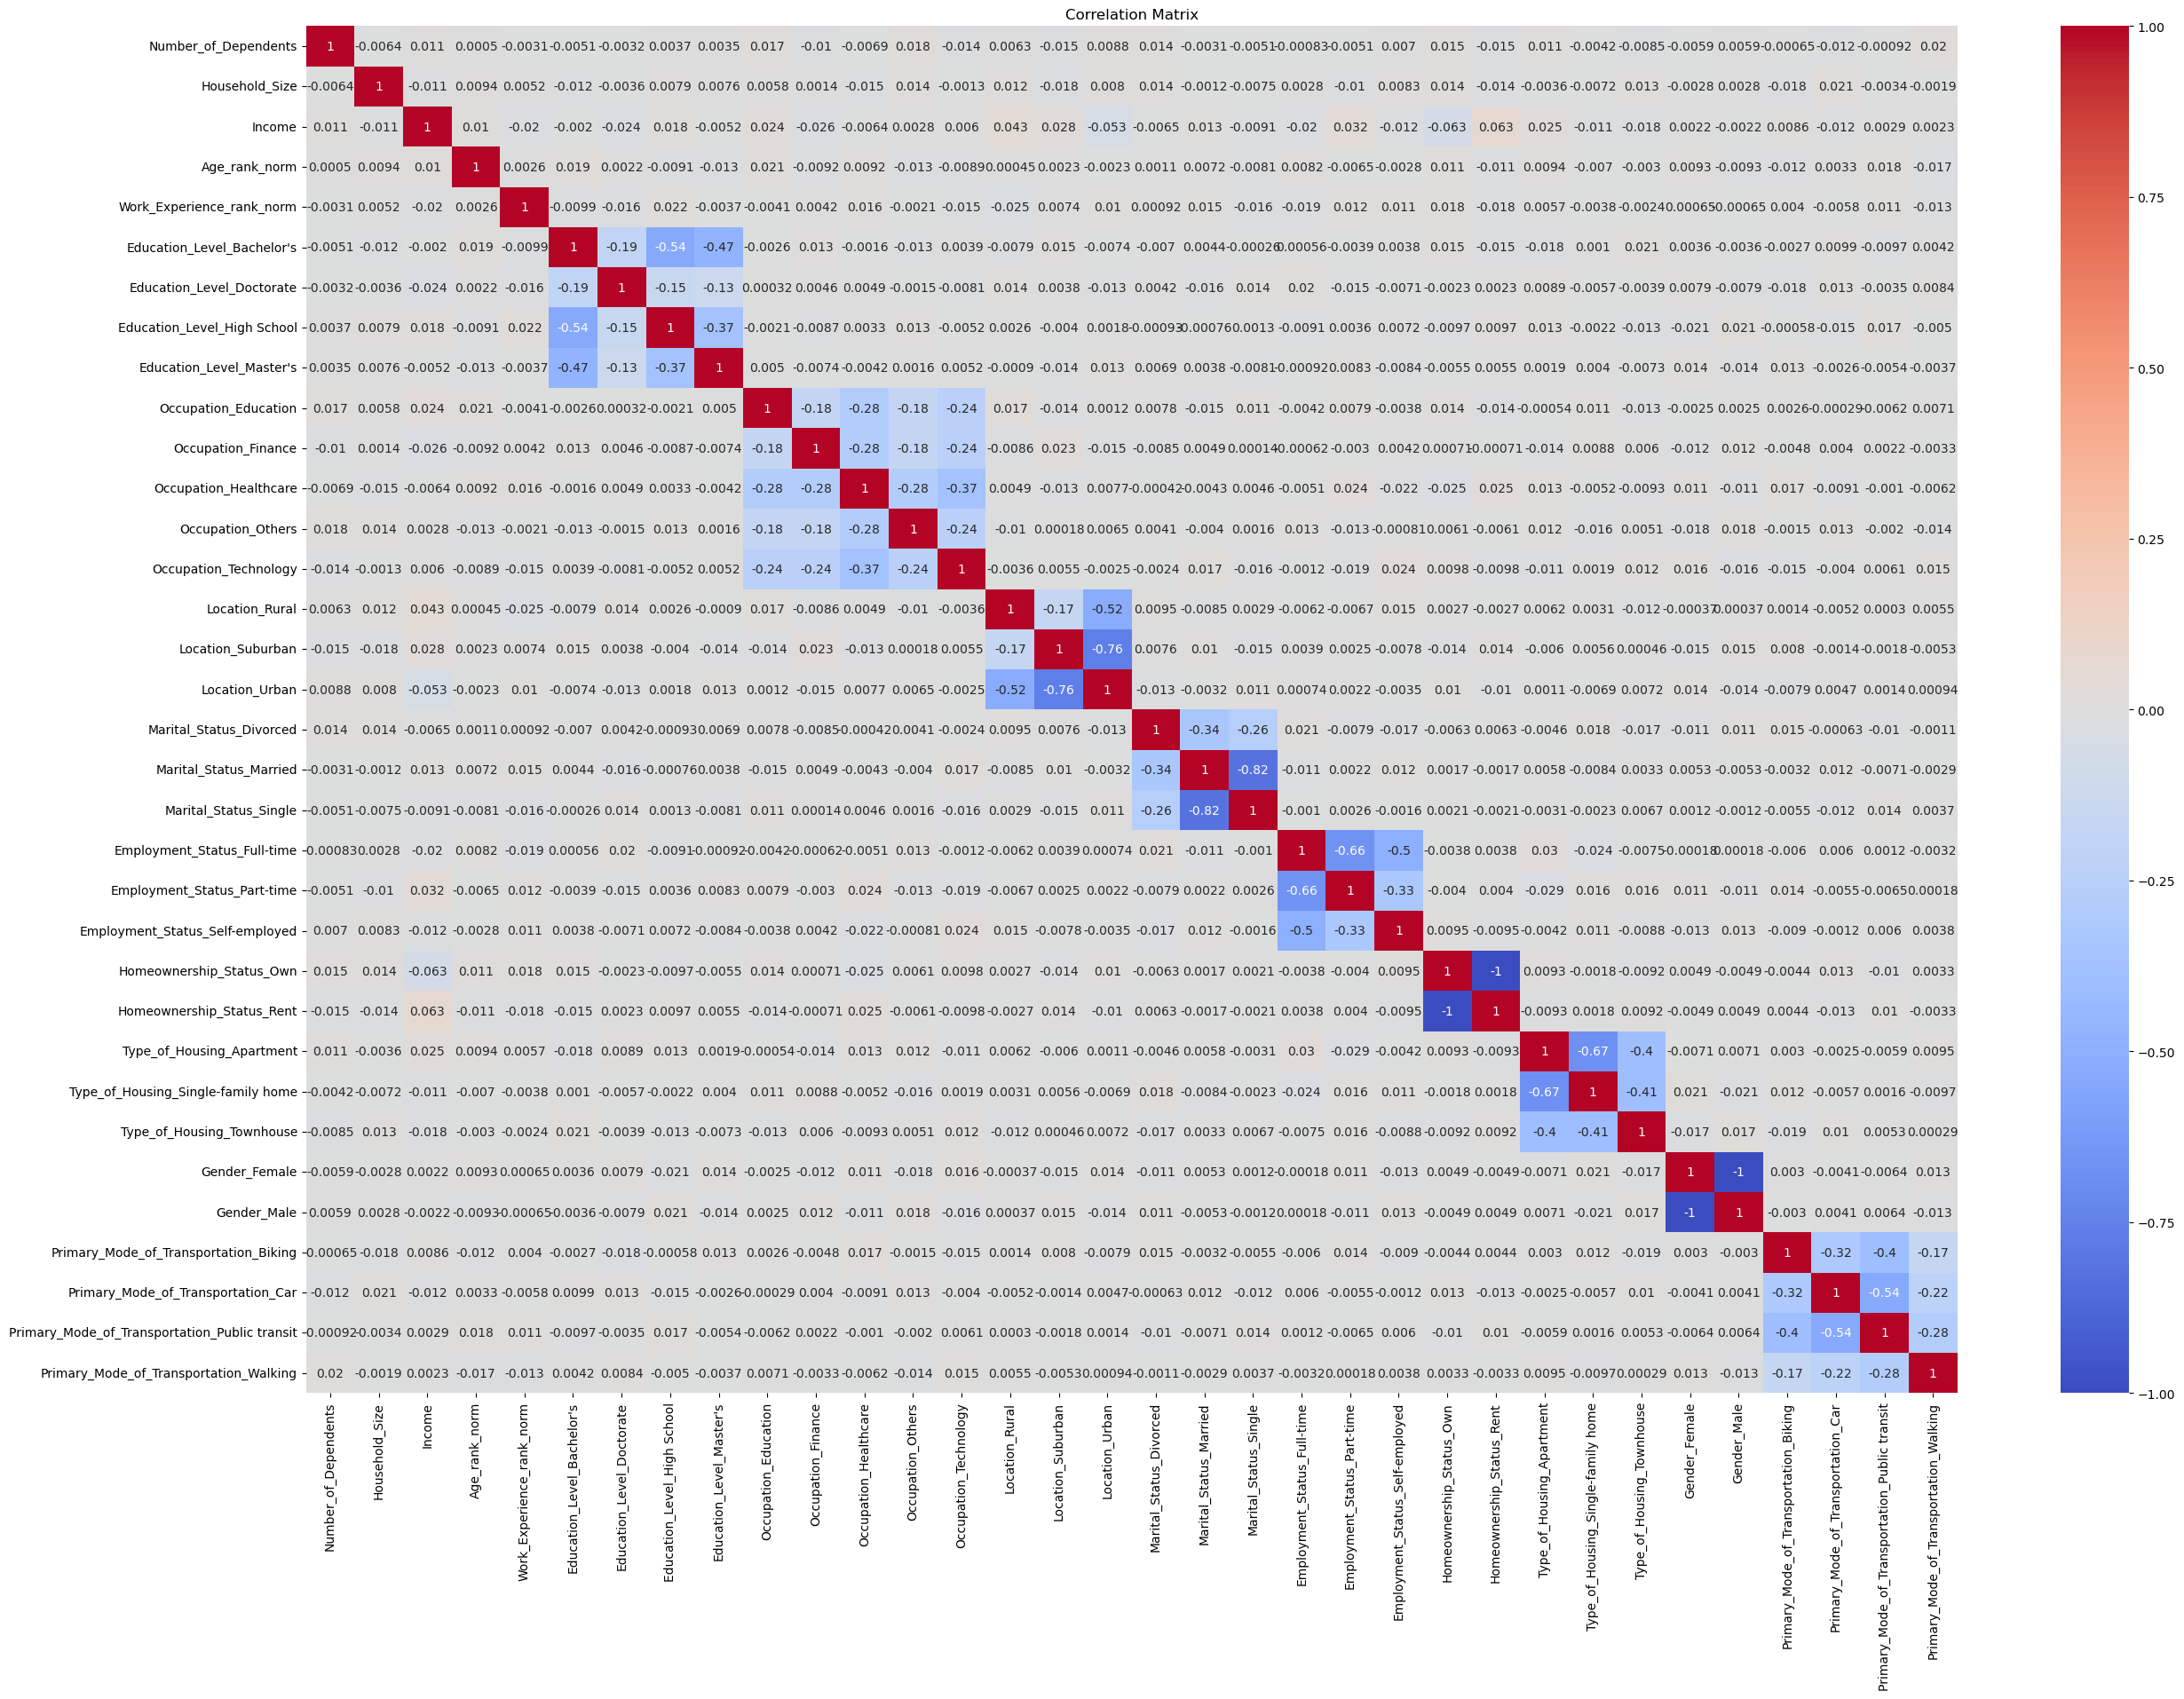

In [38]:
plt.figure(figsize=(30, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

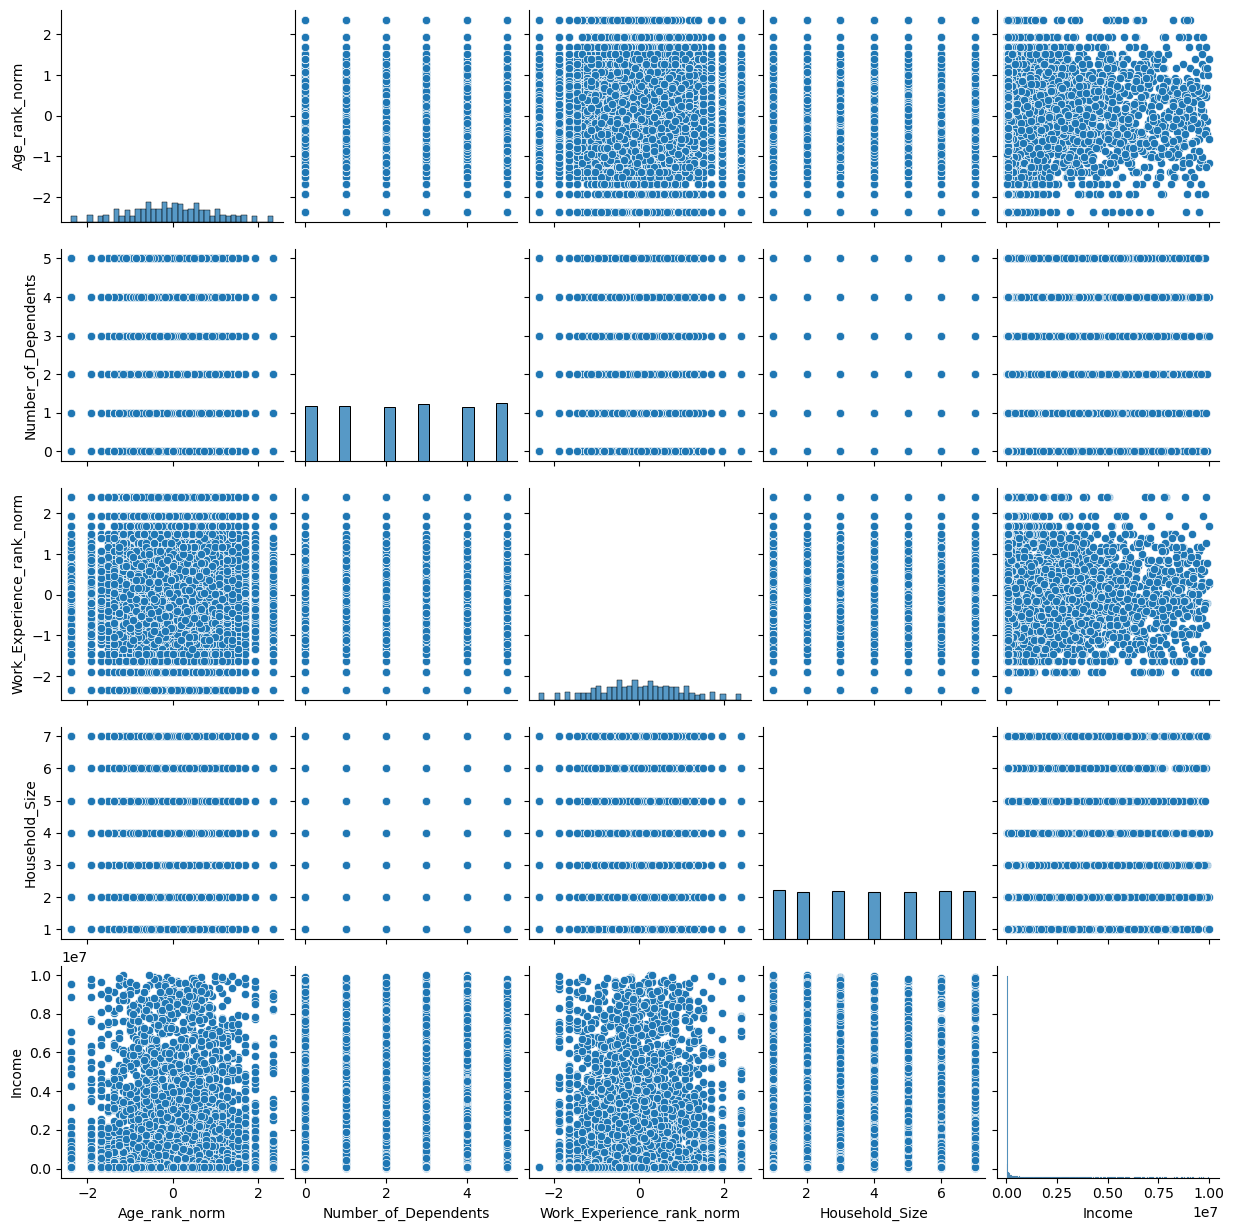

In [40]:
sns.pairplot(df[["Age_rank_norm", "Number_of_Dependents", "Work_Experience_rank_norm", "Household_Size", "Income"]])
plt.show()

In [11]:
import statsmodels.api as sm

y = df["Income"]
x = df.drop("Income", axis=1)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.958
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.85e-14
Time:                        15:26:29   Log-Likelihood:            -1.5828e+05
No. Observations:               10000   AIC:                         3.166e+05
Df Residuals:                    9975   BIC:                         3.168e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [43]:
x

const  Number_of_Dependents  Household_Size  Age_rank_norm  \
0       1.0                     5               7       0.609490   
1       1.0                     0               7       1.925235   
2       1.0                     1               7       0.105348   
3       1.0                     2               1      -0.620847   
4       1.0                     3               4       0.849146   
...     ...                   ...             ...            ...   
9995    1.0                     0               6       0.726553   
9996    1.0                     3               1      -1.262136   
9997    1.0                     3               4      -0.140456   
9998    1.0                     0               1       0.008899   
9999    1.0                     0               7      -0.346988   

      Work_Experience_rank_norm  Education_Level_Bachelor's  \
0                     -0.194863                       False   
1                     -1.331575                       False   
2                     -1.886705                        True   
3                      0.356989                       False   
4                     -0.515076                        True   
...                         ...                         ...   
9995                   0.056052                       False   
9996                  -0.459605                       False   
9997                   2.393247                       False   
9998                  -1.461421                       False   
9999                   1.682355                       False   

      Education_Level_Doctorate  Education_Level_High School  \
0                         False                        False   
1                         False                         True   
2                         False                        False   
3                         False                         True   
4                         False                        False   
...                         ...                          ...   
9995                      False                         True   
9996                      False                        False   
9997                       True                        False   
9998                      False                         True   
9999                      False                         True   

      Education_Level_Master's  Occupation_Education  ...  \
0                         True                 False  ...   
1                        False                 False  ...   
2                        False                 False  ...   
3                        False                 False  ...   
4                        False                 False  ...   
...                        ...                   ...  ...   
9995                     False                 False  ...   
9996                      True                 False  ...   
9997                     False                  True  ...   
9998                     False                  True  ...   
9999                     False                 False  ...   

      Homeownership_Status_Rent  Type_of_Housing_Apartment  \
0                         False                       True   
1                         False                       True   
2                         False                      False   
3                         False                       True   
4                         False                      False   
...                         ...                        ...   
9995                      False                      False   
9996                      False                      False   
9997                      False                      False   
9998                      False                      False   
9999                       True                      False   

      Type_of_Housing_Single-family home  Type_of_Housing_Townhouse  \
0                                  False                      False   
1                                  False   

In [35]:
dct={}

for i in range (df.shape[0]):
    if df.iloc[i]["Number_of_Dependents"] not in dct:
        dct[df.iloc[i]["Number_of_Dependents"]] = df.iloc[i]["Income"]
    else:
        dct[df.iloc[i]["Number_of_Dependents"]] += df.iloc[i]["Income"]

In [39]:
for i in dct.keys():
    dct[i] = dct[i]/(df.shape[0])

In [46]:
dct = dict(sorted(dct.items()))

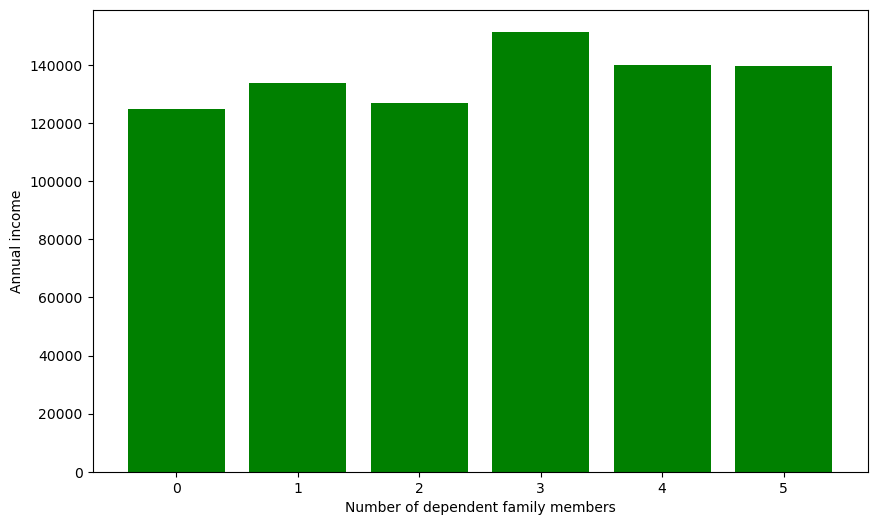

In [58]:
x = list(dct.keys())
y = list(dct.values())

plt.figure(figsize=(10, 6))

plt.bar(x, y, color="g")
plt.xlabel("Number of dependent family members")
plt.ylabel("Annual income")
plt.show()